In [7]:
import torch
from torch import nn
from torch import optim
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from nltk.classify.megam import numpy
from scipy import interp
from itertools import cycle
import time

In [8]:
import numpy as np
import os
import math
import random
import torch
# from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import plotly.graph_objects as go

from sklearn.utils import shuffle
import torch.nn as nn
!pip install torchsummary
import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

You should consider upgrading via the '/Users/pro/Documents/Sklearn/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
import numpy as np
import seaborn
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms

USE_CUDA = True

In [10]:
from sklearn.model_selection import KFold

In [201]:
train_set = pd.read_csv('../capsule_code/data/nc_train_4.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
train_set

,0,1,2,3,4,5,6,label
0,-1.296572,-0.688269,-0.831681,-0.412444,-0.307202,0.306243,-0.361374,0
1,-0.064005,-1.456182,-1.231766,-0.985112,-0.349396,-2.416853,-0.477236,3
2,1.168561,-0.578567,0.235212,-1.557780,-0.307202,0.491938,-0.361374,0
3,1.168561,-1.675586,-0.431596,-1.271446,-0.307202,0.627293,-0.399994,7
4,1.168561,-1.675586,-1.098404,1.305561,-0.307202,0.618958,-0.399994,7
...,...,...,...,...,...,...,...,...
11195,-1.296572,1.396065,-1.498489,0.732893,-0.307202,0.455599,-0.399994,11
11196,1.168561,-0.578567,-0.431596,-1.557780,-0.265008,0.498940,-0.322753,13
11197,1.168561,-1.346480,-1.498489,1.305561,-0.307202,0.565950,-0.361374,11
11198,-0.064005,-0.578567,0.902020,-0.985112,-0.222813,0.285573,-0.284132,0


In [202]:
test_set = pd.read_csv('../capsule_code/data/nc_test_4.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
test_set

,0,1,2,3,4,5,6,label
0,-1.296572,-1.675586,-1.498489,-1.557780,-0.307202,0.315577,-0.361374,11
1,-1.296572,-1.675586,-1.498489,-1.271446,-0.307202,0.314244,-0.399994,11
2,-1.296572,-1.675586,-1.498489,-1.271446,-0.307202,0.314244,-0.399994,11
3,-1.296572,-1.675586,-1.498489,-0.985112,-0.307202,0.313910,-0.361374,11
4,-1.296572,-1.675586,-1.498489,-0.985112,-0.307202,0.313910,-0.361374,11
...,...,...,...,...,...,...,...,...
2795,1.168561,1.615469,1.435466,0.446558,-0.349396,-0.063482,-0.399994,14
2796,1.168561,1.615469,1.435466,0.732893,-0.349396,-0.062816,-0.399994,14
2797,1.168561,1.615469,1.435466,1.019227,-0.349396,-0.062816,-0.399994,14
2798,1.168561,1.615469,1.435466,1.305561,-0.349396,-0.062482,-0.399994,14


In [203]:
# 划分训练集和验证集
train_set = shuffle(train_set)
all_train_data = shuffle(train_set)
train_data = all_train_data[['0','1','2','3','4','5','6']]
train_label = all_train_data['label']

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_label, test_size = 0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [204]:
# 测试集
test_set = shuffle(test_set)
all_test_data = shuffle(test_set)
X_test = all_test_data[['0','1','2','3','4','5','6']]
y_test = all_test_data['label']

In [205]:
X_train, X_test, X_valid = np.array(X_train).reshape(-1, 7), np.array(X_test).reshape(-1, 7), np.array(X_valid).reshape(-1, 7)
y_train, y_test, y_valid = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1), np.array(y_valid).reshape(-1, 1)

In [206]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train, X_valid, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_valid), torch.FloatTensor(X_test)
y_train, y_valid, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_valid), torch.FloatTensor(y_test)

In [207]:
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
  # 'Characterizes a dataset for PyTorch'
    def __init__(self, data, labels):
        # 'Initialization'
        self.labels = labels
        self.data = data

    def __len__(self):
        # 'Denotes the total number of samples'
        return len(self.data)

    def __getitem__(self, index):
        # 'Generates one sample of data'
        # Select sample
        return self.data[index], self.labels[index]

In [208]:
config = {
    'batch_size': 100,
    'shuffle': True,
    'drop_last': False
}

In [209]:
train_set = Dataset(X_train, y_train)
train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

validation_set = Dataset(X_valid, y_valid)
validation_loader = DataLoader(
    validation_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

test_set = Dataset(X_test, y_test)
test_loader = DataLoader(
    test_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

# LightCNN-9

In [210]:
class mfm(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=2, type=1):
        super(mfm, self).__init__()
        self.out_channels = out_channels
        if type == 1:
            self.filter = nn.Conv1d(in_channels, 2*out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        else:
            self.filter = nn.Linear(in_channels, 2*out_channels)

    def forward(self, x):
        x = self.filter(x)
        out = torch.split(x, self.out_channels, 1)
        return torch.max(out[0], out[1])

In [211]:
class group(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(group, self).__init__()
        self.conv_a = mfm(in_channels, in_channels, 2, 1, 1)
        self.conv   = mfm(in_channels, out_channels, kernel_size, stride, padding)

    def forward(self, x):
        x = self.conv_a(x)
        x = self.conv(x)
        return x

In [344]:
class resblock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(resblock, self).__init__()
        self.conv1 = mfm(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.conv2 = mfm(in_channels, out_channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        res = x
        out = self.conv1(x)
        out = self.conv2(out)
        out = out + res
        return out

In [336]:
class network_9layers(nn.Module):
    def __init__(self, num_classes=16):
        super(network_9layers, self).__init__()
        self.features = nn.Sequential(
            mfm(7, 32, 3, 1, 2), 
            nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True), 
            group(32, 64, 3, 1, 2), 
            nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True),
            group(64, 128, 3, 1, 2),
            nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True), 
            group(128, 92, 3, 1, 2),
            group(92, 92, 3, 1, 2),
            nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True),
            )
        self.fc1 = mfm(15*92, 256, type=0)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
#         x = F.dropout(x, training=self.training)
        out = self.fc2(x)
        return out

In [337]:
lightCNN = network_9layers()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    out = lightCNN(batch_data)

In [321]:
out.shape

torch.Size([100, 16])

In [322]:
lightCNN

network_9layers(
  (features): Sequential(
    (0): mfm(
      (filter): Conv1d(7, 64, kernel_size=(3,), stride=(1,), padding=(2,))
    )
    (1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)
    (2): group(
      (conv_a): mfm(
        (filter): Conv1d(32, 64, kernel_size=(2,), stride=(1,), padding=(1,))
      )
      (conv): mfm(
        (filter): Conv1d(32, 128, kernel_size=(3,), stride=(1,), padding=(2,))
      )
    )
    (3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)
    (4): group(
      (conv_a): mfm(
        (filter): Conv1d(64, 128, kernel_size=(2,), stride=(1,), padding=(1,))
      )
      (conv): mfm(
        (filter): Conv1d(64, 256, kernel_size=(3,), stride=(1,), padding=(2,))
      )
    )
    (5): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)
    (6): group(
      (conv_a): mfm(
        (filter): Conv1d(128, 256, kernel_size=(2,), stride=(1,), padding=(1,))
      )
      (conv): mfm

# lightCNN-29

In [366]:
class network_29layers(nn.Module):
    def __init__(self, block, layers, num_classes=16):
        super(network_29layers, self).__init__()
        self.conv1  = mfm(7, 32, 3, 1, 2)
        self.pool1  = nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True)
        self.block1 = self._make_layer(block, layers[0], 32, 32)
        self.group1 = group(32, 64, 3, 1, 2)
        self.pool2  = nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True)
        self.block2 = self._make_layer(block, layers[1], 64, 64)
        self.group2 = group(64, 128, 3, 1, 2)
        self.pool3  = nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True)
        self.block3 = self._make_layer(block, layers[2], 128, 128)
        self.group3 = group(128, 92, 3, 1, 2)
        self.block4 = self._make_layer(block, layers[3], 92, 92)
        self.group4 = group(92, 92, 3, 1, 1)
        self.pool4  = nn.MaxPool1d(kernel_size=1, stride=1, ceil_mode=True)
        self.fc     = mfm(92*13, 256, type=0)
        self.fc2    = nn.Linear(256, num_classes)
    

    def _make_layer(self, block, num_blocks, in_channels, out_channels):
        layers = []
        for i in range(0, num_blocks):
            layers.append(block(in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)

        x = self.block1(x)
        x = self.group1(x)
        x = self.pool2(x)

        x = self.block2(x)
        x = self.group2(x)
        x = self.pool3(x)

        x = self.block3(x)
        x = self.group3(x)
        x = self.block4(x)
        x = self.group4(x)
        x = self.pool4(x)

        x = x.view(x.size(0), -1)
        fc = self.fc(x)
# #         fc = F.dropout(fc, training=self.training)
        out = self.fc2(fc)
#         return x
        return out

In [367]:
def LightCNN_29Layers(**kwargs):
    model = network_29layers(resblock, [1, 2, 3, 4], **kwargs)
    return model

In [368]:
lightCNN_29 = LightCNN_29Layers(num_classes=16)
lightCNN_29
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    out = lightCNN_29(batch_data)
out.shape

torch.Size([100, 16])

In [369]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def One_hot(labels):
    num_class=16
    lb=LabelBinarizer().fit(np.array(range(num_class)))
    labels=lb.transform(labels)
    return labels

In [370]:
criterion = nn.CrossEntropyLoss()  #使用交叉熵作为损失函数
optimizer = torch.optim.Adam(lightCNN.parameters(), lr=0.001)
num_epochs = 50
num_classes = 16

In [371]:
def train(lightCNN, criterion, optimizer, 
          n_epochs):
    '''Trains a capsule network and prints out training batch loss statistics.
       Saves model parameters if *validation* loss has decreased.
       param capsule_net: trained capsule network
       param criterion: capsule loss function
       param optimizer: optimizer for updating network weights
       param n_epochs: number of epochs to train for
       param print_every: batches to print and save training loss, default = 100
       return: list of recorded training losses
       '''

    # track training loss over time
    train_losses = []
    valid_losses = []
    trainAcc1, trainAcc2, trainAcc3, trainAcc4, trainAcc5 = [], [], [], [], []
    valAcc1, valAcc2, valAcc3, valAcc4, valAcc5 = [], [], [], [], []
    trainPre, trainRecall, trainf1 = [],[],[]
    valPre, valRecall, valf1 = [],[],[]
    # one epoch = one pass over all training data 
    for epoch in range(1, n_epochs+1):
        print("-------第 {} 轮训练开始-------".format(epoch))
        '''
        使用训练集训练
        '''
        # initialize training loss
        train_loss = 0.0
        train_acc = 0.0
        train_accs = []
        lightCNN.train() # set to train mode
        train_preds = []
        train_trues = []
        correct_5 = 0.0
        correct_4 = 0.0
        correct_2 = 0.0
        correct_3 = 0.0
        correct_1 = 0.0
        count = 0
        train_acc_1, train_acc_2, train_acc_3, train_acc_4, train_acc_5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        # get batches of training image data and targets
        for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
        
#             print("batch_labels:", batch_labels)
            batch_data = batch_data.unsqueeze(0)
            batch_data = batch_data.permute(1,2,0)
            batch_labels = batch_labels.squeeze()
#             batch_labels = One_hot(batch_labels)
            # 转tensor，batch_labels: torch.Size([32, 16])
            batch_labels = batch_labels.type(torch.LongTensor)
            
            # zero out gradients
            optimizer.zero_grad()
            # get model outputs
            # logits为输出的各标签概率值
            logits = lightCNN(batch_data)

            # calculate loss
            loss = criterion(logits, batch_labels)
#             loss = CapsuleLoss(batch_data, batch_labels, logits, reconstruction)
#             loss = CNNLoss(batch_data, batch_labels, logits, reconstruction)
            # perform backpropagation and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item() # accumulated training loss
            
            batch_labels = One_hot(batch_labels)
            batch_labels = torch.from_numpy(batch_labels)
            # 根据概率值对标签进行排序
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(batch_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            count += labels.shape[0]
            correct = pred.eq(labels).float()
#             print("correct:", correct)
            correct_5 += correct[:, :5].sum()
#             print("correct_5:", correct_5)
            correct_4 += correct[:, :4].sum()
#             print("correct_4:", correct_4)
            correct_3 += correct[:, :3].sum()
#             print("correct_3:", correct_3)
            correct_2 += correct[:, :2].sum()
#             print("correct_2:", correct_2)
            correct_1 += correct[:, :1].sum()
#             print("correct_1:", correct_1)
            
            _, train_outputs = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, batch_labels = torch.max(batch_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            train_trues.append(batch_labels.cpu().detach().numpy())
            train_preds.append(train_outputs.cpu().detach().numpy())
        
            accuracy =(train_outputs.data.numpy() == batch_labels.data.numpy()).astype(int).sum()/float(batch_labels.numpy().size)
#             print("accuracy:", accuracy)
            train_accs.append(accuracy)

        train_acc1 = correct_1/count
        train_acc2 = correct_2/count
        train_acc3 = correct_3/count
        train_acc4 = correct_4/count
        train_acc5 = correct_5/count
        
        trainAcc1.append(train_acc1)
        trainAcc2.append(train_acc2)
        trainAcc3.append(train_acc3)
        trainAcc4.append(train_acc4)
        trainAcc5.append(train_acc5)
        
        y_true = np.concatenate(train_trues)
        y_pred = np.concatenate(train_preds)
        
#         ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
#         print("训练集各标签分类情况：", ans)
        
        precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
        
        trainPre.append(precision)
        trainRecall.append(recall)
        trainf1.append(f1)
        
        # train_outputs和batch_labels输出值是什么
        # 加一个AUC
        # 查一下accuracy_score这几个。
        # 设置模式，是2分类还是多分类
        # 图像显示
        
        '''
        使用验证集验证
        '''
        lightCNN.eval()
        val_loss = 0.0
        val_accs = []
        val_acc = 0.0
        val_trues, val_preds = [],[]
        val_correct = 0.0
        val_correct5 = 0.0
        val_correct4 = 0.0
        val_correct2 = 0.0
        val_correct3 = 0.0
        val_correct1 = 0.0
        
        val_count = 0
        val_acc1, val_acc2, val_acc3, val_acc4, val_acc5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        
        for val_i, (val_data, val_labels) in enumerate(validation_loader):
            
            val_data = val_data.unsqueeze(0)
            val_data = val_data.permute(1,2,0)
            val_labels = val_labels.squeeze()
            # 转tensor，batch_labels: torch.Size([32, 16])
            val_labels = val_labels.type(torch.LongTensor)
            # get model outputs
            logits = lightCNN(val_data)
            
            # calculate loss
            val_losses = criterion(logits, val_labels)
#             val_losses = CNNLoss(val_data, val_labels , logits, reconstruction)

            val_loss += val_losses.item() # accumulated training loss
            
            val_labels = One_hot(val_labels)
            val_labels = torch.from_numpy(val_labels)
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(val_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            
            val_count += labels.shape[0]
            
            val_correct = pred.eq(labels).float()
            val_correct5 += val_correct[:, :5].sum()
            val_correct4 += val_correct[:, :4].sum()
            val_correct3 += val_correct[:, :3].sum()
            val_correct2 += val_correct[:, :2].sum()
            val_correct1 += val_correct[:, :1].sum()
            
            _, val_output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, val_label = torch.max(val_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            val_trues.append(val_label.cpu().detach().numpy())
            val_preds.append(val_output.cpu().detach().numpy())
            
            
            

        val_acc1 = val_correct1/val_count
        val_acc2 = val_correct2/val_count
        val_acc3 = val_correct3/val_count
        val_acc4 = val_correct4/val_count
        val_acc5 = val_correct5/val_count
        
        valAcc1.append(val_acc1)
        valAcc2.append(val_acc2)
        valAcc3.append(val_acc3)
        valAcc4.append(val_acc4)
        valAcc5.append(val_acc5)
        
        y_val_true = np.concatenate(val_trues)
        y_val_pred = np.concatenate(val_preds)
        
#         val_ans = classification_report(y_val_true, y_val_pred,digits=5) # 小数点后保留5位有效数字
#         print("验证集各标签分类情况：", val_ans)
        
        val_precision, val_recall, val_f1 = precision_recall_fscore_support(y_val_true,y_val_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
        
        valPre.append(val_precision)
        valRecall.append(val_recall)
        valf1.append(val_f1)
    
        train_loss = train_loss/len(train_loader)
        train_loss = train_loss/100.0
        train_losses.append(train_loss)
        val_loss = val_loss/ len(validation_loader)
        val_loss = val_loss/100.0
        valid_losses.append(val_loss)
        print('train Loss: {:.4f} \t valid Loss: {:.4f}'.format(train_loss, val_loss))
        print('train acc1: {:.4f} \t valid acc1: {:.4f}'.format(train_acc1, val_acc1))
        print('train acc2: {:.4f} \t valid acc2: {:.4f}'.format(train_acc2, val_acc2))
        print('train acc3: {:.4f} \t valid acc3: {:.4f}'.format(train_acc3, val_acc3))
        print('train acc4: {:.4f} \t valid acc4: {:.4f}'.format(train_acc4, val_acc4))
        print('train acc5: {:.4f} \t valid acc5: {:.4f}'.format(train_acc5, val_acc5))
        print('train precision: {:.4f} \t valid precision: {:.4f}'.format(precision, val_precision))
        print('train recall: {:.4f} \t valid recall: {:.4f}'.format(recall, val_recall))
        print('train f1-score: {:.4f} \t valid f1-score: {:.4f}'.format(f1, val_f1))
    
    # 画出训练损失和验证损失曲线
    x= range(n_epochs)
    plt.plot(x, train_losses, color='coral', label='Training loss')
    plt.plot(x, valid_losses, color='#054E9F', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # 画出训练集topk准确率
    plt.plot(x, trainAcc1, color='coral', label='Training acc1')
    plt.plot(x, trainAcc2, color='#054E9F', label='Training acc2')
    plt.plot(x, trainAcc3, color='#CD853F', label='Training acc3')
    plt.plot(x, trainAcc4, color='#FFC0CB', label='Training acc4')
    plt.plot(x, trainAcc5, color='#4169E1', label='Training acc5')
    plt.title('Training top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出验证集topk准确率
    plt.plot(x, valAcc1, color='coral', label='validation acc1')
    plt.plot(x, valAcc2, color='#054E9F', label='validation acc2')
    plt.plot(x, valAcc3, color='#CD853F', label='validation acc3')
    plt.plot(x, valAcc4, color='#FFC0CB', label='validation acc4')
    plt.plot(x, valAcc5, color='#4169E1', label='validation acc5')
    plt.title('validation top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainPre, color='coral', label='Training precision')
    plt.plot(x, valPre, color='#054E9F', label='Validation precision')
    plt.title('Training and validation precision')
    plt.xlabel('Epoch')
    plt.ylabel('precision')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainRecall, color='coral', label='Training Recall')
    plt.plot(x, valRecall, color='#054E9F', label='Validation Recall')
    plt.title('Training and validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainf1, color='coral', label='Training f1-score')
    plt.plot(x, valRecall, color='#054E9F', label='Validation f1-score')
    plt.title('Training and validation f1-score')
    plt.xlabel('Epoch')
    plt.ylabel('f1-score')
    plt.legend()
    plt.show()
    
#         print('train AUC: {:.4f} \t valid AUC: {:.4f}'.format(AUC, val_AUC))

## LightCNN-9 

### fold0(train) 

1637157748.813455
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0169 	 valid Loss: 0.0133
train acc1: 0.5519 	 valid acc1: 0.6407
train acc2: 0.6332 	 valid acc2: 0.7275
train acc3: 0.6893 	 valid acc3: 0.7754
train acc4: 0.7411 	 valid acc4: 0.8279
train acc5: 0.7869 	 valid acc5: 0.8661
train precision: 0.2516 	 valid precision: 0.3739
train recall: 0.1898 	 valid recall: 0.3646
train f1-score: 0.1948 	 valid f1-score: 0.3397
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0112 	 valid Loss: 0.0100
train acc1: 0.6652 	 valid acc1: 0.6886
train acc2: 0.7807 	 valid acc2: 0.8064
train acc3: 0.8576 	 valid acc3: 0.8754
train acc4: 0.9007 	 valid acc4: 0.9421
train acc5: 0.9344 	 valid acc5: 0.9693
train precision: 0.4635 	 valid precision: 0.4953
train recall: 0.4368 	 valid recall: 0.4778
train f1-score: 0.4337 	 valid f1-score: 0.4709
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0096 	 valid Loss: 0.0097
train acc1: 0.6914 	 valid acc1: 0.7064
train acc2: 0.8195 	 valid acc2: 0.8243
train acc3: 0.8932 	 valid acc3: 0.8896
train acc4: 0.9395 	 valid acc4: 0.9282
train acc5: 0.9664 	 valid acc5: 0.9657
train precision: 0.5342 	 valid precision: 0.5299
train recall: 0.5089 	 valid recall: 0.5394
train f1-score: 0.5075 	 valid f1-score: 0.5228
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0087 	 valid Loss: 0.0085
train acc1: 0.7106 	 valid acc1: 0.7043
train acc2: 0.8413 	 valid acc2: 0.8479
train acc3: 0.9130 	 valid acc3: 0.9304
train acc4: 0.9570 	 valid acc4: 0.9689
train acc5: 0.9764 	 valid acc5: 0.9821
train precision: 0.6849 	 valid precision: 0.5854
train recall: 0.5438 	 valid recall: 0.4989
train f1-score: 0.5447 	 valid f1-score: 0.5078
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0083 	 valid Loss: 0.0079
train acc1: 0.7244 	 valid acc1: 0.7289
train acc2: 0.8504 	 valid acc2: 0.8614
train acc3: 0.9212 	 valid acc3: 0.9357
train acc4: 0.9626 	 valid acc4: 0.9693
train acc5: 0.9798 	 valid acc5: 0.9850
train precision: 0.6349 	 valid precision: 0.6115
train recall: 0.5792 	 valid recall: 0.5997
train f1-score: 0.5892 	 valid f1-score: 0.5907
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0077 	 valid Loss: 0.0077
train acc1: 0.7374 	 valid acc1: 0.7350
train acc2: 0.8630 	 valid acc2: 0.8679
train acc3: 0.9307 	 valid acc3: 0.9371
train acc4: 0.9673 	 valid acc4: 0.9725
train acc5: 0.9852 	 valid acc5: 0.9904
train precision: 0.7043 	 valid precision: 0.6562
train recall: 0.6095 	 valid recall: 0.5713
train f1-score: 0.6201 	 valid f1-score: 0.5821
-------第 7 轮训练开始-------
train Loss: 0.0072 	 valid Loss: 0.0071
train acc1: 0.7525 	 valid acc1: 0.7589
train acc2: 0.8799 	 valid acc2: 0.8800
train acc3: 0.9431 	 valid acc3: 0.9464
train acc4: 0.9742 	 valid acc4: 0.9754
train acc5: 0.9871 	 valid acc5: 0.9907
train precision: 0.7051 	 valid precision: 0.7690
train recall: 0.6440 	 valid recall: 0.6503
train f1-score: 0.6521 	 valid f1-score: 0.6432
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0069 	 valid Loss: 0.0073
train acc1: 0.7623 	 valid acc1: 0.7450
train acc2: 0.8875 	 valid acc2: 0.8789
train acc3: 0.9442 	 valid acc3: 0.9393
train acc4: 0.9764 	 valid acc4: 0.9771
train acc5: 0.9889 	 valid acc5: 0.9911
train precision: 0.6978 	 valid precision: 0.6866
train recall: 0.6600 	 valid recall: 0.6021
train f1-score: 0.6684 	 valid f1-score: 0.6176
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0071
train acc1: 0.7667 	 valid acc1: 0.7489
train acc2: 0.8873 	 valid acc2: 0.8907
train acc3: 0.9498 	 valid acc3: 0.9500
train acc4: 0.9762 	 valid acc4: 0.9786
train acc5: 0.9892 	 valid acc5: 0.9936
train precision: 0.7152 	 valid precision: 0.7256
train recall: 0.6761 	 valid recall: 0.5993
train f1-score: 0.6814 	 valid f1-score: 0.6086
-------第 10 轮训练开始-------
train Loss: 0.0067 	 valid Loss: 0.0070
train acc1: 0.7663 	 valid acc1: 0.7607
train acc2: 0.8923 	 valid acc2: 0.8836
train acc3: 0.9506 	 valid acc3: 0.9396
train acc4: 0.9792 	 valid acc4: 0.9775
train acc5: 0.9896 	 valid acc5: 0.9893
train precision: 0.7096 	 valid precision: 0.7269
train recall: 0.6714 	 valid recall: 0.6321
train f1-score: 0.6799 	 valid f1-score: 0.6468
-------第 11 轮训练开始-------
train Loss: 0.0063 	 valid Loss: 0.0071
train acc1: 0.7807 	 valid acc1: 0.7593
train acc2: 0.8992 	 valid acc2: 0.8850
train acc3: 0.9536 	 valid acc3: 0.9464
train acc4: 0.9804 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0065
train acc1: 0.7800 	 valid acc1: 0.7743
train acc2: 0.9027 	 valid acc2: 0.8925
train acc3: 0.9587 	 valid acc3: 0.9554
train acc4: 0.9832 	 valid acc4: 0.9854
train acc5: 0.9932 	 valid acc5: 0.9943
train precision: 0.7444 	 valid precision: 0.7327
train recall: 0.7026 	 valid recall: 0.6925
train f1-score: 0.7082 	 valid f1-score: 0.6880
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0062
train acc1: 0.7912 	 valid acc1: 0.7786
train acc2: 0.9133 	 valid acc2: 0.9118
train acc3: 0.9617 	 valid acc3: 0.9661
train acc4: 0.9849 	 valid acc4: 0.9846
train acc5: 0.9931 	 valid acc5: 0.9932
train precision: 0.7583 	 valid precision: 0.7143
train recall: 0.7217 	 valid recall: 0.6749
train f1-score: 0.7254 	 valid f1-score: 0.6761
-------第 14 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0063
train acc1: 0.7996 	 valid acc1: 0.7796
train acc2: 0.9151 	 valid acc2: 0.9043
train acc3: 0.9662 	 valid acc3: 0.9579
train acc4: 0.9883 	 valid acc4: 0.9829
train acc5: 0.9955 	 valid acc5: 0.9961
train precision: 0.7713 	 valid precision: 0.7341
train recall: 0.7371 	 valid recall: 0.7086
train f1-score: 0.7415 	 valid f1-score: 0.7023
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0061
train acc1: 0.8002 	 valid acc1: 0.7889
train acc2: 0.9204 	 valid acc2: 0.9086
train acc3: 0.9671 	 valid acc3: 0.9614
train acc4: 0.9876 	 valid acc4: 0.9875
train acc5: 0.9960 	 valid acc5: 0.9964
train precision: 0.7740 	 valid precision: 0.7312
train recall: 0.7407 	 valid recall: 0.7059
train f1-score: 0.7453 	 valid f1-score: 0.7092
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0056 	 valid Loss: 0.0062
train acc1: 0.8019 	 valid acc1: 0.7854
train acc2: 0.9144 	 valid acc2: 0.9118
train acc3: 0.9652 	 valid acc3: 0.9596
train acc4: 0.9863 	 valid acc4: 0.9843
train acc5: 0.9944 	 valid acc5: 0.9961
train precision: 0.7665 	 valid precision: 0.7273
train recall: 0.7408 	 valid recall: 0.7123
train f1-score: 0.7427 	 valid f1-score: 0.7153
-------第 17 轮训练开始-------
train Loss: 0.0053 	 valid Loss: 0.0062
train acc1: 0.8112 	 valid acc1: 0.7782
train acc2: 0.9261 	 valid acc2: 0.9046
train acc3: 0.9719 	 valid acc3: 0.9614
train acc4: 0.9876 	 valid acc4: 0.9868
train acc5: 0.9963 	 valid acc5: 0.9961
train precision: 0.7934 	 valid precision: 0.7301
train recall: 0.7535 	 valid recall: 0.7428
train f1-score: 0.7556 	 valid f1-score: 0.7264
-------第 18 轮训练开始-------
train Loss: 0.0054 	 valid Loss: 0.0065
train acc1: 0.8080 	 valid acc1: 0.7850
train acc2: 0.9248 	 valid acc2: 0.9114
train acc3: 0.9702 	 valid acc3: 0.9632
train acc4: 0.9908 	 valid

train Loss: 0.0031 	 valid Loss: 0.0051
train acc1: 0.8894 	 valid acc1: 0.8357
train acc2: 0.9755 	 valid acc2: 0.9475
train acc3: 0.9933 	 valid acc3: 0.9821
train acc4: 0.9990 	 valid acc4: 0.9957
train acc5: 0.9998 	 valid acc5: 0.9982
train precision: 0.8801 	 valid precision: 0.8238
train recall: 0.8617 	 valid recall: 0.7882
train f1-score: 0.8675 	 valid f1-score: 0.7909
-------第 38 轮训练开始-------
train Loss: 0.0031 	 valid Loss: 0.0047
train acc1: 0.8862 	 valid acc1: 0.8443
train acc2: 0.9746 	 valid acc2: 0.9571
train acc3: 0.9938 	 valid acc3: 0.9839
train acc4: 0.9992 	 valid acc4: 0.9964
train acc5: 0.9999 	 valid acc5: 0.9986
train precision: 0.8744 	 valid precision: 0.8238
train recall: 0.8610 	 valid recall: 0.8010
train f1-score: 0.8653 	 valid f1-score: 0.8093
-------第 39 轮训练开始-------
train Loss: 0.0030 	 valid Loss: 0.0052
train acc1: 0.8921 	 valid acc1: 0.8229
train acc2: 0.9749 	 valid acc2: 0.9439
train acc3: 0.9943 	 valid acc3: 0.9821
train acc4: 0.9987 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0168 	 valid Loss: 0.0180
train acc1: 0.7360 	 valid acc1: 0.7168
train acc2: 0.8840 	 valid acc2: 0.8511
train acc3: 0.9467 	 valid acc3: 0.9171
train acc4: 0.9762 	 valid acc4: 0.9604
train acc5: 0.9874 	 valid acc5: 0.9811
train precision: 0.6549 	 valid precision: 0.6070
train recall: 0.6396 	 valid recall: 0.5683
train f1-score: 0.6433 	 valid f1-score: 0.5661
-------第 51 轮训练开始-------
train Loss: 0.0088 	 valid Loss: 0.0073
train acc1: 0.7745 	 valid acc1: 0.7861
train acc2: 0.8981 	 valid acc2: 0.8961
train acc3: 0.9550 	 valid acc3: 0.9561
train acc4: 0.9790 	 valid acc4: 0.9836
train acc5: 0.9902 	 valid acc5: 0.9950
train precision: 0.7204 	 valid precision: 0.7442
train recall: 0.6854 	 valid recall: 0.7370
train f1-score: 0.6922 	 valid f1-score: 0.7244
-------第 52 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0061
train acc1: 0.8135 	 valid acc1: 0.8121
train acc2: 0.9262 	 valid acc2: 0.9304
train acc3: 0.9715 	 valid acc3: 0.9714
train acc4: 0.9898 	 valid

train Loss: 0.0018 	 valid Loss: 0.0046
train acc1: 0.9336 	 valid acc1: 0.8711
train acc2: 0.9908 	 valid acc2: 0.9646
train acc3: 0.9980 	 valid acc3: 0.9893
train acc4: 0.9999 	 valid acc4: 0.9932
train acc5: 0.9999 	 valid acc5: 0.9964
train precision: 0.9298 	 valid precision: 0.8472
train recall: 0.9215 	 valid recall: 0.8610
train f1-score: 0.9250 	 valid f1-score: 0.8502
-------第 72 轮训练开始-------
train Loss: 0.0017 	 valid Loss: 0.0052
train acc1: 0.9352 	 valid acc1: 0.8575
train acc2: 0.9948 	 valid acc2: 0.9614
train acc3: 0.9993 	 valid acc3: 0.9875
train acc4: 0.9998 	 valid acc4: 0.9939
train acc5: 0.9999 	 valid acc5: 0.9968
train precision: 0.9311 	 valid precision: 0.8445
train recall: 0.9245 	 valid recall: 0.8179
train f1-score: 0.9273 	 valid f1-score: 0.8267
-------第 73 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0052
train acc1: 0.9332 	 valid acc1: 0.8729
train acc2: 0.9935 	 valid acc2: 0.9646
train acc3: 0.9982 	 valid acc3: 0.9861
train acc4: 0.9995 	 valid

train Loss: 0.0017 	 valid Loss: 0.0050
train acc1: 0.9381 	 valid acc1: 0.8764
train acc2: 0.9938 	 valid acc2: 0.9596
train acc3: 0.9982 	 valid acc3: 0.9775
train acc4: 0.9995 	 valid acc4: 0.9882
train acc5: 0.9998 	 valid acc5: 0.9929
train precision: 0.9300 	 valid precision: 0.8609
train recall: 0.9241 	 valid recall: 0.8548
train f1-score: 0.9269 	 valid f1-score: 0.8564
-------第 93 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0053
train acc1: 0.9465 	 valid acc1: 0.8725
train acc2: 0.9945 	 valid acc2: 0.9611
train acc3: 0.9992 	 valid acc3: 0.9804
train acc4: 0.9999 	 valid acc4: 0.9911
train acc5: 1.0000 	 valid acc5: 0.9929
train precision: 0.9410 	 valid precision: 0.8467
train recall: 0.9387 	 valid recall: 0.8516
train f1-score: 0.9398 	 valid f1-score: 0.8430
-------第 94 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0046
train acc1: 0.9555 	 valid acc1: 0.8907
train acc2: 0.9967 	 valid acc2: 0.9643
train acc3: 0.9996 	 valid acc3: 0.9836
train acc4: 1.0000 	 valid

train Loss: 0.0011 	 valid Loss: 0.0051
train acc1: 0.9594 	 valid acc1: 0.8914
train acc2: 0.9960 	 valid acc2: 0.9650
train acc3: 0.9998 	 valid acc3: 0.9857
train acc4: 1.0000 	 valid acc4: 0.9946
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9567 	 valid precision: 0.8752
train recall: 0.9549 	 valid recall: 0.8831
train f1-score: 0.9557 	 valid f1-score: 0.8782
-------第 114 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0047
train acc1: 0.9554 	 valid acc1: 0.8900
train acc2: 0.9970 	 valid acc2: 0.9636
train acc3: 0.9994 	 valid acc3: 0.9882
train acc4: 0.9999 	 valid acc4: 0.9932
train acc5: 0.9999 	 valid acc5: 0.9968
train precision: 0.9483 	 valid precision: 0.8724
train recall: 0.9483 	 valid recall: 0.8756
train f1-score: 0.9482 	 valid f1-score: 0.8725
-------第 115 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0055
train acc1: 0.9635 	 valid acc1: 0.8864
train acc2: 0.9976 	 valid acc2: 0.9614
train acc3: 0.9995 	 valid acc3: 0.9807
train acc4: 1.0000 	 val

train Loss: 0.0026 	 valid Loss: 0.0051
train acc1: 0.9111 	 valid acc1: 0.8693
train acc2: 0.9845 	 valid acc2: 0.9586
train acc3: 0.9957 	 valid acc3: 0.9854
train acc4: 0.9994 	 valid acc4: 0.9957
train acc5: 1.0000 	 valid acc5: 0.9979
train precision: 0.9172 	 valid precision: 0.8757
train recall: 0.8913 	 valid recall: 0.8310
train f1-score: 0.8991 	 valid f1-score: 0.8416
-------第 135 轮训练开始-------
train Loss: 0.0023 	 valid Loss: 0.0055
train acc1: 0.9244 	 valid acc1: 0.8632
train acc2: 0.9876 	 valid acc2: 0.9582
train acc3: 0.9971 	 valid acc3: 0.9832
train acc4: 0.9994 	 valid acc4: 0.9929
train acc5: 0.9999 	 valid acc5: 0.9971
train precision: 0.9319 	 valid precision: 0.8524
train recall: 0.9071 	 valid recall: 0.8343
train f1-score: 0.9161 	 valid f1-score: 0.8345
-------第 136 轮训练开始-------
train Loss: 0.0022 	 valid Loss: 0.0057
train acc1: 0.9256 	 valid acc1: 0.8700
train acc2: 0.9890 	 valid acc2: 0.9593
train acc3: 0.9973 	 valid acc3: 0.9854
train acc4: 0.9993 	 val

train Loss: 0.0013 	 valid Loss: 0.0057
train acc1: 0.9525 	 valid acc1: 0.8836
train acc2: 0.9961 	 valid acc2: 0.9639
train acc3: 0.9996 	 valid acc3: 0.9850
train acc4: 1.0000 	 valid acc4: 0.9946
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9519 	 valid precision: 0.8863
train recall: 0.9486 	 valid recall: 0.8492
train f1-score: 0.9501 	 valid f1-score: 0.8593
-------第 156 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0057
train acc1: 0.9535 	 valid acc1: 0.8804
train acc2: 0.9962 	 valid acc2: 0.9607
train acc3: 0.9993 	 valid acc3: 0.9839
train acc4: 1.0000 	 valid acc4: 0.9946
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9516 	 valid precision: 0.8715
train recall: 0.9494 	 valid recall: 0.8601
train f1-score: 0.9504 	 valid f1-score: 0.8586
-------第 157 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0060
train acc1: 0.9482 	 valid acc1: 0.8711
train acc2: 0.9951 	 valid acc2: 0.9554
train acc3: 0.9983 	 valid acc3: 0.9814
train acc4: 1.0000 	 val

train Loss: 0.0015 	 valid Loss: 0.0062
train acc1: 0.9477 	 valid acc1: 0.8639
train acc2: 0.9954 	 valid acc2: 0.9571
train acc3: 0.9994 	 valid acc3: 0.9804
train acc4: 1.0000 	 valid acc4: 0.9932
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9435 	 valid precision: 0.8430
train recall: 0.9395 	 valid recall: 0.8613
train f1-score: 0.9414 	 valid f1-score: 0.8477
-------第 177 轮训练开始-------
train Loss: 0.0017 	 valid Loss: 0.0052
train acc1: 0.9407 	 valid acc1: 0.8868
train acc2: 0.9939 	 valid acc2: 0.9682
train acc3: 0.9989 	 valid acc3: 0.9861
train acc4: 0.9999 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9352 	 valid precision: 0.8809
train recall: 0.9311 	 valid recall: 0.8560
train f1-score: 0.9329 	 valid f1-score: 0.8649
-------第 178 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0058
train acc1: 0.9493 	 valid acc1: 0.8754
train acc2: 0.9960 	 valid acc2: 0.9639
train acc3: 0.9993 	 valid acc3: 0.9832
train acc4: 0.9999 	 val

train Loss: 0.0013 	 valid Loss: 0.0054
train acc1: 0.9569 	 valid acc1: 0.8882
train acc2: 0.9940 	 valid acc2: 0.9661
train acc3: 0.9985 	 valid acc3: 0.9836
train acc4: 0.9999 	 valid acc4: 0.9886
train acc5: 1.0000 	 valid acc5: 0.9954
train precision: 0.9524 	 valid precision: 0.8852
train recall: 0.9495 	 valid recall: 0.8617
train f1-score: 0.9509 	 valid f1-score: 0.8693
-------第 198 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0051
train acc1: 0.9585 	 valid acc1: 0.8946
train acc2: 0.9969 	 valid acc2: 0.9718
train acc3: 0.9998 	 valid acc3: 0.9836
train acc4: 1.0000 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9537 	 valid precision: 0.8858
train recall: 0.9517 	 valid recall: 0.8734
train f1-score: 0.9526 	 valid f1-score: 0.8789
-------第 199 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0062
train acc1: 0.9598 	 valid acc1: 0.8636
train acc2: 0.9970 	 valid acc2: 0.9564
train acc3: 0.9998 	 valid acc3: 0.9796
train acc4: 0.9999 	 val

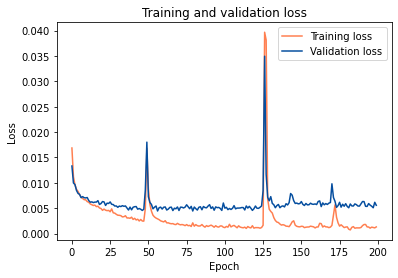

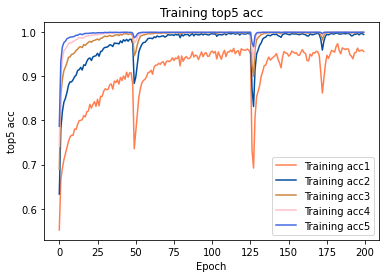

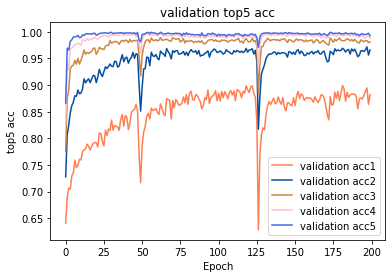

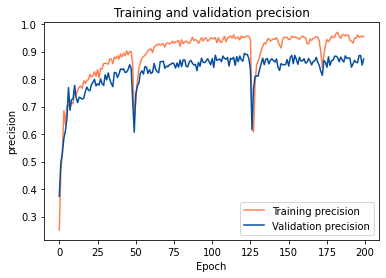

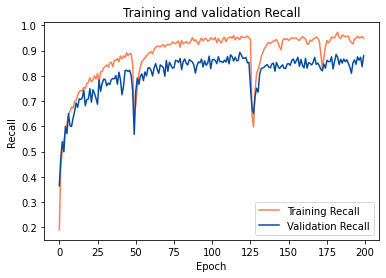

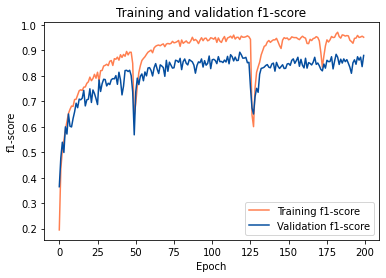

1637162310.011706


In [132]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(lightCNN, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### fold1(train) 

1637162407.0601358
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0164 	 valid Loss: 0.0126
train acc1: 0.5545 	 valid acc1: 0.6354
train acc2: 0.6360 	 valid acc2: 0.7504
train acc3: 0.7006 	 valid acc3: 0.8211
train acc4: 0.7495 	 valid acc4: 0.8743
train acc5: 0.7912 	 valid acc5: 0.9118
train precision: 0.2864 	 valid precision: 0.3320
train recall: 0.2026 	 valid recall: 0.3708
train f1-score: 0.2132 	 valid f1-score: 0.3170
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0112 	 valid Loss: 0.0103
train acc1: 0.6658 	 valid acc1: 0.6854
train acc2: 0.7833 	 valid acc2: 0.8189
train acc3: 0.8540 	 valid acc3: 0.8925
train acc4: 0.8944 	 valid acc4: 0.9296
train acc5: 0.9318 	 valid acc5: 0.9596
train precision: 0.4682 	 valid precision: 0.5180
train recall: 0.4456 	 valid recall: 0.4946
train f1-score: 0.4437 	 valid f1-score: 0.4870
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0097 	 valid Loss: 0.0096
train acc1: 0.7012 	 valid acc1: 0.6939
train acc2: 0.8239 	 valid acc2: 0.8214
train acc3: 0.9011 	 valid acc3: 0.9071
train acc4: 0.9417 	 valid acc4: 0.9507
train acc5: 0.9654 	 valid acc5: 0.9679
train precision: 0.6096 	 valid precision: 0.5776
train recall: 0.5227 	 valid recall: 0.5699
train f1-score: 0.5316 	 valid f1-score: 0.5313
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0084 	 valid Loss: 0.0089
train acc1: 0.7306 	 valid acc1: 0.7164
train acc2: 0.8514 	 valid acc2: 0.8357
train acc3: 0.9218 	 valid acc3: 0.9168
train acc4: 0.9593 	 valid acc4: 0.9596
train acc5: 0.9781 	 valid acc5: 0.9818
train precision: 0.6646 	 valid precision: 0.5663
train recall: 0.5919 	 valid recall: 0.5482
train f1-score: 0.6024 	 valid f1-score: 0.5262
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0080 	 valid Loss: 0.0080
train acc1: 0.7361 	 valid acc1: 0.7300
train acc2: 0.8624 	 valid acc2: 0.8646
train acc3: 0.9318 	 valid acc3: 0.9361
train acc4: 0.9674 	 valid acc4: 0.9707
train acc5: 0.9831 	 valid acc5: 0.9836
train precision: 0.7207 	 valid precision: 0.6753
train recall: 0.6134 	 valid recall: 0.6069
train f1-score: 0.6207 	 valid f1-score: 0.5977
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0075 	 valid Loss: 0.0074
train acc1: 0.7467 	 valid acc1: 0.7489
train acc2: 0.8740 	 valid acc2: 0.8875
train acc3: 0.9387 	 valid acc3: 0.9489
train acc4: 0.9704 	 valid acc4: 0.9754
train acc5: 0.9860 	 valid acc5: 0.9857
train precision: 0.7040 	 valid precision: 0.6893
train recall: 0.6345 	 valid recall: 0.6440
train f1-score: 0.6429 	 valid f1-score: 0.6417
-------第 7 轮训练开始-------
train Loss: 0.0070 	 valid Loss: 0.0069
train acc1: 0.7614 	 valid acc1: 0.7571
train acc2: 0.8887 	 valid acc2: 0.8871
train acc3: 0.9507 	 valid acc3: 0.9464
train acc4: 0.9767 	 valid acc4: 0.9775
train acc5: 0.9900 	 valid acc5: 0.9882
train precision: 0.7332 	 valid precision: 0.7673
train recall: 0.6641 	 valid recall: 0.6906
train f1-score: 0.6740 	 valid f1-score: 0.6739
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0067
train acc1: 0.7760 	 valid acc1: 0.7618
train acc2: 0.8996 	 valid acc2: 0.8964
train acc3: 0.9546 	 valid acc3: 0.9593
train acc4: 0.9817 	 valid acc4: 0.9789
train acc5: 0.9924 	 valid acc5: 0.9889
train precision: 0.7417 	 valid precision: 0.7126
train recall: 0.6950 	 valid recall: 0.6657
train f1-score: 0.7001 	 valid f1-score: 0.6624
-------第 9 轮训练开始-------
train Loss: 0.0064 	 valid Loss: 0.0071
train acc1: 0.7735 	 valid acc1: 0.7507
train acc2: 0.9037 	 valid acc2: 0.8700
train acc3: 0.9571 	 valid acc3: 0.9382
train acc4: 0.9825 	 valid acc4: 0.9757
train acc5: 0.9914 	 valid acc5: 0.9896
train precision: 0.7476 	 valid precision: 0.7061
train recall: 0.6942 	 valid recall: 0.6385
train f1-score: 0.7003 	 valid f1-score: 0.6567
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0064
train acc1: 0.7871 	 valid acc1: 0.7864
train acc2: 0.9104 	 valid acc2: 0.9046
train acc3: 0.9625 	 valid acc3: 0.9636
train acc4: 0.9862 	 valid acc4: 0.9843
train acc5: 0.9949 	 valid acc5: 0.9957
train precision: 0.7518 	 valid precision: 0.7407
train recall: 0.7186 	 valid recall: 0.7491
train f1-score: 0.7219 	 valid f1-score: 0.7269
-------第 11 轮训练开始-------
train Loss: 0.0061 	 valid Loss: 0.0060
train acc1: 0.7898 	 valid acc1: 0.7914
train acc2: 0.9112 	 valid acc2: 0.9104
train acc3: 0.9583 	 valid acc3: 0.9643
train acc4: 0.9858 	 valid acc4: 0.9889
train acc5: 0.9958 	 valid acc5: 0.9968
train precision: 0.7618 	 valid precision: 0.7755
train recall: 0.7193 	 valid recall: 0.7153
train f1-score: 0.7240 	 valid f1-score: 0.7161
-------第 12 轮训练开始-------
train Loss: 0.0059 	 valid Loss: 0.0067
train acc1: 0.7927 	 valid acc1: 0.7704
train acc2: 0.9150 	 valid acc2: 0.9036
train acc3: 0.9654 	 valid acc3: 0.9579
train acc4: 0.9889 	 valid

train Loss: 0.0036 	 valid Loss: 0.0054
train acc1: 0.8683 	 valid acc1: 0.8293
train acc2: 0.9692 	 valid acc2: 0.9479
train acc3: 0.9921 	 valid acc3: 0.9811
train acc4: 0.9985 	 valid acc4: 0.9954
train acc5: 0.9996 	 valid acc5: 0.9986
train precision: 0.8547 	 valid precision: 0.7916
train recall: 0.8395 	 valid recall: 0.8165
train f1-score: 0.8434 	 valid f1-score: 0.7953
-------第 32 轮训练开始-------
train Loss: 0.0038 	 valid Loss: 0.0057
train acc1: 0.8644 	 valid acc1: 0.8129
train acc2: 0.9618 	 valid acc2: 0.9325
train acc3: 0.9864 	 valid acc3: 0.9771
train acc4: 0.9970 	 valid acc4: 0.9943
train acc5: 0.9994 	 valid acc5: 0.9971
train precision: 0.8534 	 valid precision: 0.8165
train recall: 0.8294 	 valid recall: 0.7439
train f1-score: 0.8368 	 valid f1-score: 0.7611
-------第 33 轮训练开始-------
train Loss: 0.0036 	 valid Loss: 0.0051
train acc1: 0.8671 	 valid acc1: 0.8364
train acc2: 0.9701 	 valid acc2: 0.9546
train acc3: 0.9911 	 valid acc3: 0.9839
train acc4: 0.9982 	 valid

train Loss: 0.0022 	 valid Loss: 0.0048
train acc1: 0.9217 	 valid acc1: 0.8750
train acc2: 0.9900 	 valid acc2: 0.9675
train acc3: 0.9987 	 valid acc3: 0.9839
train acc4: 0.9998 	 valid acc4: 0.9957
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9128 	 valid precision: 0.8613
train recall: 0.9072 	 valid recall: 0.8559
train f1-score: 0.9094 	 valid f1-score: 0.8558
-------第 53 轮训练开始-------
train Loss: 0.0022 	 valid Loss: 0.0051
train acc1: 0.9201 	 valid acc1: 0.8493
train acc2: 0.9880 	 valid acc2: 0.9536
train acc3: 0.9965 	 valid acc3: 0.9804
train acc4: 0.9995 	 valid acc4: 0.9925
train acc5: 0.9998 	 valid acc5: 0.9971
train precision: 0.9088 	 valid precision: 0.8424
train recall: 0.9074 	 valid recall: 0.7981
train f1-score: 0.9077 	 valid f1-score: 0.8127
-------第 54 轮训练开始-------
train Loss: 0.0023 	 valid Loss: 0.0048
train acc1: 0.9106 	 valid acc1: 0.8725
train acc2: 0.9889 	 valid acc2: 0.9636
train acc3: 0.9974 	 valid acc3: 0.9843
train acc4: 0.9995 	 valid

train Loss: 0.0016 	 valid Loss: 0.0047
train acc1: 0.9406 	 valid acc1: 0.8843
train acc2: 0.9940 	 valid acc2: 0.9643
train acc3: 0.9988 	 valid acc3: 0.9829
train acc4: 0.9998 	 valid acc4: 0.9925
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9334 	 valid precision: 0.8689
train recall: 0.9313 	 valid recall: 0.8738
train f1-score: 0.9321 	 valid f1-score: 0.8687
-------第 74 轮训练开始-------
train Loss: 0.0016 	 valid Loss: 0.0058
train acc1: 0.9431 	 valid acc1: 0.8561
train acc2: 0.9936 	 valid acc2: 0.9629
train acc3: 0.9994 	 valid acc3: 0.9818
train acc4: 0.9999 	 valid acc4: 0.9882
train acc5: 1.0000 	 valid acc5: 0.9925
train precision: 0.9346 	 valid precision: 0.8456
train recall: 0.9337 	 valid recall: 0.7913
train f1-score: 0.9339 	 valid f1-score: 0.7905
-------第 75 轮训练开始-------
train Loss: 0.0065 	 valid Loss: 0.0063
train acc1: 0.8821 	 valid acc1: 0.8318
train acc2: 0.9689 	 valid acc2: 0.9450
train acc3: 0.9905 	 valid acc3: 0.9768
train acc4: 0.9958 	 valid

train Loss: 0.0013 	 valid Loss: 0.0053
train acc1: 0.9535 	 valid acc1: 0.8821
train acc2: 0.9969 	 valid acc2: 0.9689
train acc3: 0.9995 	 valid acc3: 0.9850
train acc4: 1.0000 	 valid acc4: 0.9896
train acc5: 1.0000 	 valid acc5: 0.9936
train precision: 0.9455 	 valid precision: 0.8741
train recall: 0.9451 	 valid recall: 0.8689
train f1-score: 0.9452 	 valid f1-score: 0.8685
-------第 95 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0061
train acc1: 0.9544 	 valid acc1: 0.8693
train acc2: 0.9957 	 valid acc2: 0.9550
train acc3: 0.9994 	 valid acc3: 0.9804
train acc4: 0.9999 	 valid acc4: 0.9914
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9488 	 valid precision: 0.8674
train recall: 0.9479 	 valid recall: 0.8267
train f1-score: 0.9483 	 valid f1-score: 0.8436
-------第 96 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0055
train acc1: 0.9465 	 valid acc1: 0.8825
train acc2: 0.9961 	 valid acc2: 0.9607
train acc3: 0.9996 	 valid acc3: 0.9821
train acc4: 1.0000 	 valid

train Loss: 0.0012 	 valid Loss: 0.0052
train acc1: 0.9585 	 valid acc1: 0.8829
train acc2: 0.9969 	 valid acc2: 0.9718
train acc3: 0.9995 	 valid acc3: 0.9850
train acc4: 0.9999 	 valid acc4: 0.9918
train acc5: 0.9999 	 valid acc5: 0.9954
train precision: 0.9509 	 valid precision: 0.8742
train recall: 0.9494 	 valid recall: 0.8542
train f1-score: 0.9500 	 valid f1-score: 0.8615
-------第 116 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0058
train acc1: 0.9642 	 valid acc1: 0.8804
train acc2: 0.9982 	 valid acc2: 0.9636
train acc3: 0.9996 	 valid acc3: 0.9829
train acc4: 0.9998 	 valid acc4: 0.9911
train acc5: 1.0000 	 valid acc5: 0.9936
train precision: 0.9556 	 valid precision: 0.8541
train recall: 0.9545 	 valid recall: 0.8769
train f1-score: 0.9550 	 valid f1-score: 0.8630
-------第 117 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0049
train acc1: 0.9513 	 valid acc1: 0.8961
train acc2: 0.9936 	 valid acc2: 0.9682
train acc3: 0.9987 	 valid acc3: 0.9825
train acc4: 0.9998 	 val

train Loss: 0.0011 	 valid Loss: 0.0060
train acc1: 0.9621 	 valid acc1: 0.8839
train acc2: 0.9968 	 valid acc2: 0.9636
train acc3: 0.9994 	 valid acc3: 0.9804
train acc4: 0.9999 	 valid acc4: 0.9886
train acc5: 1.0000 	 valid acc5: 0.9914
train precision: 0.9543 	 valid precision: 0.8675
train recall: 0.9550 	 valid recall: 0.8849
train f1-score: 0.9546 	 valid f1-score: 0.8751
-------第 137 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0053
train acc1: 0.9664 	 valid acc1: 0.8961
train acc2: 0.9980 	 valid acc2: 0.9671
train acc3: 0.9996 	 valid acc3: 0.9821
train acc4: 0.9999 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9939
train precision: 0.9589 	 valid precision: 0.8911
train recall: 0.9588 	 valid recall: 0.8735
train f1-score: 0.9588 	 valid f1-score: 0.8811
-------第 138 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0050
train acc1: 0.9683 	 valid acc1: 0.8929
train acc2: 0.9985 	 valid acc2: 0.9707
train acc3: 0.9996 	 valid acc3: 0.9832
train acc4: 1.0000 	 val

train Loss: 0.0013 	 valid Loss: 0.0048
train acc1: 0.9595 	 valid acc1: 0.8968
train acc2: 0.9967 	 valid acc2: 0.9679
train acc3: 0.9989 	 valid acc3: 0.9857
train acc4: 0.9996 	 valid acc4: 0.9932
train acc5: 0.9998 	 valid acc5: 0.9971
train precision: 0.9516 	 valid precision: 0.8839
train recall: 0.9504 	 valid recall: 0.8762
train f1-score: 0.9509 	 valid f1-score: 0.8781
-------第 158 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0051
train acc1: 0.9633 	 valid acc1: 0.9000
train acc2: 0.9970 	 valid acc2: 0.9664
train acc3: 0.9995 	 valid acc3: 0.9818
train acc4: 0.9996 	 valid acc4: 0.9904
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9572 	 valid precision: 0.8951
train recall: 0.9549 	 valid recall: 0.8787
train f1-score: 0.9560 	 valid f1-score: 0.8859
-------第 159 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0055
train acc1: 0.9721 	 valid acc1: 0.8989
train acc2: 0.9987 	 valid acc2: 0.9675
train acc3: 0.9995 	 valid acc3: 0.9850
train acc4: 1.0000 	 val

train Loss: 0.0036 	 valid Loss: 0.0050
train acc1: 0.8948 	 valid acc1: 0.8746
train acc2: 0.9765 	 valid acc2: 0.9639
train acc3: 0.9924 	 valid acc3: 0.9861
train acc4: 0.9985 	 valid acc4: 0.9946
train acc5: 0.9996 	 valid acc5: 0.9964
train precision: 0.8853 	 valid precision: 0.8625
train recall: 0.8639 	 valid recall: 0.8441
train f1-score: 0.8715 	 valid f1-score: 0.8512
-------第 179 轮训练开始-------
train Loss: 0.0021 	 valid Loss: 0.0050
train acc1: 0.9302 	 valid acc1: 0.8782
train acc2: 0.9908 	 valid acc2: 0.9639
train acc3: 0.9983 	 valid acc3: 0.9861
train acc4: 0.9996 	 valid acc4: 0.9939
train acc5: 0.9998 	 valid acc5: 0.9971
train precision: 0.9221 	 valid precision: 0.8645
train recall: 0.9127 	 valid recall: 0.8841
train f1-score: 0.9168 	 valid f1-score: 0.8708
-------第 180 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0049
train acc1: 0.9526 	 valid acc1: 0.8946
train acc2: 0.9949 	 valid acc2: 0.9725
train acc3: 0.9990 	 valid acc3: 0.9875
train acc4: 0.9999 	 val

train Loss: 0.0006 	 valid Loss: 0.0057
train acc1: 0.9819 	 valid acc1: 0.8914
train acc2: 0.9987 	 valid acc2: 0.9707
train acc3: 0.9998 	 valid acc3: 0.9850
train acc4: 1.0000 	 valid acc4: 0.9900
train acc5: 1.0000 	 valid acc5: 0.9914
train precision: 0.9793 	 valid precision: 0.8757
train recall: 0.9796 	 valid recall: 0.8856
train f1-score: 0.9794 	 valid f1-score: 0.8801
-------第 200 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0061
train acc1: 0.9715 	 valid acc1: 0.8786
train acc2: 0.9983 	 valid acc2: 0.9664
train acc3: 0.9995 	 valid acc3: 0.9846
train acc4: 0.9999 	 valid acc4: 0.9900
train acc5: 1.0000 	 valid acc5: 0.9950
train precision: 0.9640 	 valid precision: 0.8732
train recall: 0.9633 	 valid recall: 0.8502
train f1-score: 0.9636 	 valid f1-score: 0.8588


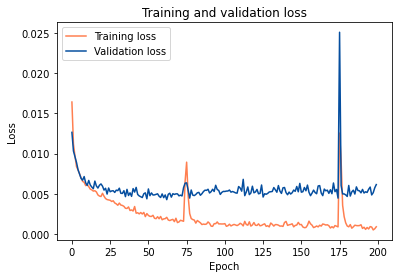

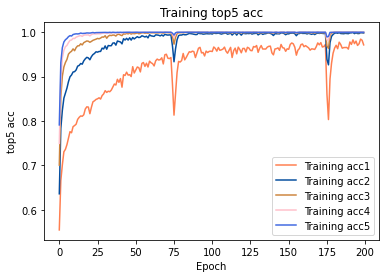

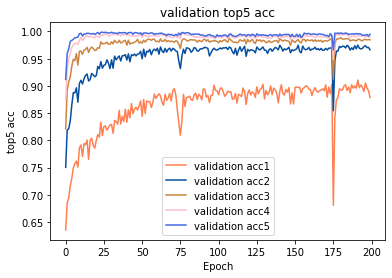

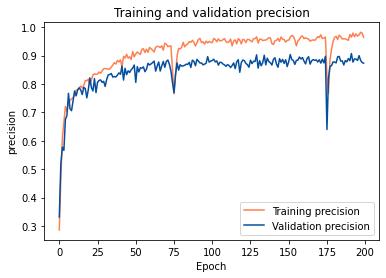

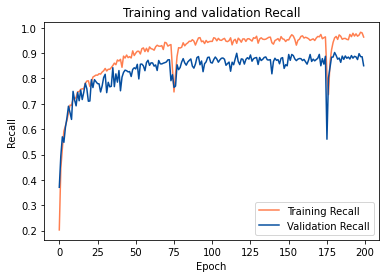

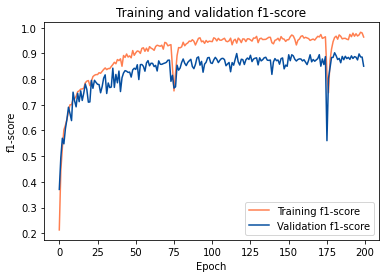

1637199263.331829


In [154]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(lightCNN, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### fold2(train) 

1637233001.409472
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0162 	 valid Loss: 0.0127
train acc1: 0.5598 	 valid acc1: 0.6043
train acc2: 0.6426 	 valid acc2: 0.7429
train acc3: 0.7090 	 valid acc3: 0.8250
train acc4: 0.7692 	 valid acc4: 0.8757
train acc5: 0.8161 	 valid acc5: 0.9068
train precision: 0.2244 	 valid precision: 0.3190
train recall: 0.2039 	 valid recall: 0.2912
train f1-score: 0.1972 	 valid f1-score: 0.2467
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0117 	 valid Loss: 0.0103
train acc1: 0.6574 	 valid acc1: 0.6914
train acc2: 0.7661 	 valid acc2: 0.8054
train acc3: 0.8448 	 valid acc3: 0.8746
train acc4: 0.8925 	 valid acc4: 0.9246
train acc5: 0.9255 	 valid acc5: 0.9514
train precision: 0.4389 	 valid precision: 0.4951
train recall: 0.4171 	 valid recall: 0.4921
train f1-score: 0.4094 	 valid f1-score: 0.4804
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0100 	 valid Loss: 0.0093
train acc1: 0.6888 	 valid acc1: 0.6936
train acc2: 0.8144 	 valid acc2: 0.8250
train acc3: 0.8911 	 valid acc3: 0.8986
train acc4: 0.9387 	 valid acc4: 0.9446
train acc5: 0.9615 	 valid acc5: 0.9679
train precision: 0.5397 	 valid precision: 0.5453
train recall: 0.4985 	 valid recall: 0.5391
train f1-score: 0.5002 	 valid f1-score: 0.5314
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0091 	 valid Loss: 0.0092
train acc1: 0.7074 	 valid acc1: 0.6789
train acc2: 0.8383 	 valid acc2: 0.8293
train acc3: 0.9085 	 valid acc3: 0.9089
train acc4: 0.9550 	 valid acc4: 0.9543
train acc5: 0.9761 	 valid acc5: 0.9775
train precision: 0.5910 	 valid precision: 0.5682
train recall: 0.5438 	 valid recall: 0.5174
train f1-score: 0.5455 	 valid f1-score: 0.5172
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0082 	 valid Loss: 0.0082
train acc1: 0.7227 	 valid acc1: 0.7286
train acc2: 0.8537 	 valid acc2: 0.8575
train acc3: 0.9257 	 valid acc3: 0.9164
train acc4: 0.9651 	 valid acc4: 0.9600
train acc5: 0.9837 	 valid acc5: 0.9804
train precision: 0.6794 	 valid precision: 0.7014
train recall: 0.5828 	 valid recall: 0.6407
train f1-score: 0.5937 	 valid f1-score: 0.6270
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0074 	 valid Loss: 0.0074
train acc1: 0.7468 	 valid acc1: 0.7475
train acc2: 0.8745 	 valid acc2: 0.8700
train acc3: 0.9405 	 valid acc3: 0.9418
train acc4: 0.9736 	 valid acc4: 0.9764
train acc5: 0.9881 	 valid acc5: 0.9875
train precision: 0.7085 	 valid precision: 0.6934
train recall: 0.6331 	 valid recall: 0.6643
train f1-score: 0.6427 	 valid f1-score: 0.6464
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0071 	 valid Loss: 0.0070
train acc1: 0.7596 	 valid acc1: 0.7664
train acc2: 0.8812 	 valid acc2: 0.8771
train acc3: 0.9455 	 valid acc3: 0.9518
train acc4: 0.9774 	 valid acc4: 0.9761
train acc5: 0.9898 	 valid acc5: 0.9896
train precision: 0.7042 	 valid precision: 0.7063
train recall: 0.6547 	 valid recall: 0.7019
train f1-score: 0.6640 	 valid f1-score: 0.6867
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0072
train acc1: 0.7654 	 valid acc1: 0.7379
train acc2: 0.8904 	 valid acc2: 0.8768
train acc3: 0.9514 	 valid acc3: 0.9475
train acc4: 0.9833 	 valid acc4: 0.9793
train acc5: 0.9930 	 valid acc5: 0.9946
train precision: 0.7174 	 valid precision: 0.6805
train recall: 0.6739 	 valid recall: 0.5859
train f1-score: 0.6801 	 valid f1-score: 0.6063
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0066
train acc1: 0.7725 	 valid acc1: 0.7782
train acc2: 0.8967 	 valid acc2: 0.8946
train acc3: 0.9557 	 valid acc3: 0.9604
train acc4: 0.9844 	 valid acc4: 0.9861
train acc5: 0.9929 	 valid acc5: 0.9950
train precision: 0.7121 	 valid precision: 0.7219
train recall: 0.6835 	 valid recall: 0.6888
train f1-score: 0.6894 	 valid f1-score: 0.6927
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0069
train acc1: 0.7723 	 valid acc1: 0.7471
train acc2: 0.8979 	 valid acc2: 0.8746
train acc3: 0.9575 	 valid acc3: 0.9475
train acc4: 0.9832 	 valid acc4: 0.9775
train acc5: 0.9937 	 valid acc5: 0.9939
train precision: 0.7252 	 valid precision: 0.6884
train recall: 0.6921 	 valid recall: 0.6502
train f1-score: 0.6962 	 valid f1-score: 0.6475
-------第 11 轮训练开始-------
train Loss: 0.0060 	 valid Loss: 0.0065
train acc1: 0.7868 	 valid acc1: 0.7761
train acc2: 0.9098 	 valid acc2: 0.8932
train acc3: 0.9654 	 valid acc3: 0.9507
train acc4: 0.9874 	 valid acc4: 0.9814
train acc5: 0.9964 	 valid acc5: 0.9943
train precision: 0.7467 	 valid precision: 0.7621
train recall: 0.7189 	 valid recall: 0.7116
train f1-score: 0.7188 	 valid f1-score: 0.7095
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0059 	 valid Loss: 0.0066
train acc1: 0.7940 	 valid acc1: 0.7875
train acc2: 0.9114 	 valid acc2: 0.8929
train acc3: 0.9643 	 valid acc3: 0.9511
train acc4: 0.9869 	 valid acc4: 0.9800
train acc5: 0.9946 	 valid acc5: 0.9936
train precision: 0.7701 	 valid precision: 0.7412
train recall: 0.7276 	 valid recall: 0.7361
train f1-score: 0.7317 	 valid f1-score: 0.7162
-------第 13 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0064
train acc1: 0.8013 	 valid acc1: 0.7800
train acc2: 0.9189 	 valid acc2: 0.9000
train acc3: 0.9658 	 valid acc3: 0.9639
train acc4: 0.9893 	 valid acc4: 0.9811
train acc5: 0.9971 	 valid acc5: 0.9929
train precision: 0.7754 	 valid precision: 0.7471
train recall: 0.7417 	 valid recall: 0.7207
train f1-score: 0.7441 	 valid f1-score: 0.7082
-------第 14 轮训练开始-------
train Loss: 0.0056 	 valid Loss: 0.0065
train acc1: 0.8048 	 valid acc1: 0.7714
train acc2: 0.9200 	 valid acc2: 0.8939
train acc3: 0.9668 	 valid acc3: 0.9529
train acc4: 0.9910 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0042 	 valid Loss: 0.0100
train acc1: 0.8608 	 valid acc1: 0.7493
train acc2: 0.9663 	 valid acc2: 0.8818
train acc3: 0.9896 	 valid acc3: 0.9418
train acc4: 0.9973 	 valid acc4: 0.9714
train acc5: 0.9992 	 valid acc5: 0.9857
train precision: 0.8350 	 valid precision: 0.6786
train recall: 0.8238 	 valid recall: 0.6297
train f1-score: 0.8263 	 valid f1-score: 0.6308
-------第 33 轮训练开始-------
train Loss: 0.0092 	 valid Loss: 0.0067
train acc1: 0.7688 	 valid acc1: 0.7707
train acc2: 0.8987 	 valid acc2: 0.8943
train acc3: 0.9529 	 valid acc3: 0.9618
train acc4: 0.9824 	 valid acc4: 0.9893
train acc5: 0.9924 	 valid acc5: 0.9975
train precision: 0.7017 	 valid precision: 0.7256
train recall: 0.6725 	 valid recall: 0.7224
train f1-score: 0.6772 	 valid f1-score: 0.7041
-------第 34 轮训练开始-------
train Loss: 0.0051 	 valid Loss: 0.0059
train acc1: 0.8221 	 valid acc1: 0.7932
train acc2: 0.9376 	 valid acc2: 0.9143
train acc3: 0.9774 	 valid acc3: 0.9661
train acc4: 0.9919 	 valid

train Loss: 0.0022 	 valid Loss: 0.0051
train acc1: 0.9220 	 valid acc1: 0.8507
train acc2: 0.9886 	 valid acc2: 0.9529
train acc3: 0.9976 	 valid acc3: 0.9846
train acc4: 0.9996 	 valid acc4: 0.9893
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9126 	 valid precision: 0.8320
train recall: 0.9101 	 valid recall: 0.8355
train f1-score: 0.9107 	 valid f1-score: 0.8235
-------第 54 轮训练开始-------
train Loss: 0.0022 	 valid Loss: 0.0052
train acc1: 0.9173 	 valid acc1: 0.8464
train acc2: 0.9893 	 valid acc2: 0.9571
train acc3: 0.9976 	 valid acc3: 0.9796
train acc4: 0.9996 	 valid acc4: 0.9925
train acc5: 0.9999 	 valid acc5: 0.9964
train precision: 0.9082 	 valid precision: 0.8454
train recall: 0.9026 	 valid recall: 0.7894
train f1-score: 0.9048 	 valid f1-score: 0.8093
-------第 55 轮训练开始-------
train Loss: 0.0022 	 valid Loss: 0.0052
train acc1: 0.9160 	 valid acc1: 0.8561
train acc2: 0.9877 	 valid acc2: 0.9486
train acc3: 0.9974 	 valid acc3: 0.9768
train acc4: 0.9996 	 valid

train Loss: 0.0016 	 valid Loss: 0.0054
train acc1: 0.9410 	 valid acc1: 0.8604
train acc2: 0.9935 	 valid acc2: 0.9561
train acc3: 0.9992 	 valid acc3: 0.9789
train acc4: 0.9999 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9936
train precision: 0.9338 	 valid precision: 0.8388
train recall: 0.9311 	 valid recall: 0.8488
train f1-score: 0.9322 	 valid f1-score: 0.8417
-------第 75 轮训练开始-------
train Loss: 0.0016 	 valid Loss: 0.0048
train acc1: 0.9419 	 valid acc1: 0.8707
train acc2: 0.9943 	 valid acc2: 0.9586
train acc3: 0.9990 	 valid acc3: 0.9779
train acc4: 1.0000 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9950
train precision: 0.9345 	 valid precision: 0.8551
train recall: 0.9309 	 valid recall: 0.8464
train f1-score: 0.9325 	 valid f1-score: 0.8459
-------第 76 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0055
train acc1: 0.9467 	 valid acc1: 0.8618
train acc2: 0.9936 	 valid acc2: 0.9521
train acc3: 0.9990 	 valid acc3: 0.9807
train acc4: 0.9998 	 valid

train Loss: 0.0014 	 valid Loss: 0.0053
train acc1: 0.9524 	 valid acc1: 0.8911
train acc2: 0.9948 	 valid acc2: 0.9611
train acc3: 0.9992 	 valid acc3: 0.9829
train acc4: 0.9999 	 valid acc4: 0.9904
train acc5: 0.9999 	 valid acc5: 0.9943
train precision: 0.9438 	 valid precision: 0.8744
train recall: 0.9418 	 valid recall: 0.8881
train f1-score: 0.9426 	 valid f1-score: 0.8794
-------第 96 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0058
train acc1: 0.9600 	 valid acc1: 0.8814
train acc2: 0.9979 	 valid acc2: 0.9607
train acc3: 0.9998 	 valid acc3: 0.9804
train acc4: 0.9999 	 valid acc4: 0.9889
train acc5: 1.0000 	 valid acc5: 0.9939
train precision: 0.9557 	 valid precision: 0.8653
train recall: 0.9535 	 valid recall: 0.8752
train f1-score: 0.9545 	 valid f1-score: 0.8671
-------第 97 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0060
train acc1: 0.9601 	 valid acc1: 0.8889
train acc2: 0.9965 	 valid acc2: 0.9607
train acc3: 0.9998 	 valid acc3: 0.9804
train acc4: 0.9998 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0184 	 valid Loss: 0.0282
train acc1: 0.8168 	 valid acc1: 0.6404
train acc2: 0.9196 	 valid acc2: 0.7807
train acc3: 0.9520 	 valid acc3: 0.8618
train acc4: 0.9708 	 valid acc4: 0.9014
train acc5: 0.9829 	 valid acc5: 0.9446
train precision: 0.7663 	 valid precision: 0.4967
train recall: 0.7599 	 valid recall: 0.5087
train f1-score: 0.7623 	 valid f1-score: 0.4716
-------第 107 轮训练开始-------
train Loss: 0.0119 	 valid Loss: 0.0070
train acc1: 0.7636 	 valid acc1: 0.8071
train acc2: 0.8858 	 valid acc2: 0.9157
train acc3: 0.9415 	 valid acc3: 0.9646
train acc4: 0.9721 	 valid acc4: 0.9846
train acc5: 0.9852 	 valid acc5: 0.9961
train precision: 0.7028 	 valid precision: 0.7583
train recall: 0.6841 	 valid recall: 0.7540
train f1-score: 0.6895 	 valid f1-score: 0.7396
-------第 108 轮训练开始-------
train Loss: 0.0054 	 valid Loss: 0.0071
train acc1: 0.8520 	 valid acc1: 0.8168
train acc2: 0.9526 	 valid acc2: 0.9354
train acc3: 0.9837 	 valid acc3: 0.9782
train acc4: 0.9954 	 val

train Loss: 0.0011 	 valid Loss: 0.0053
train acc1: 0.9645 	 valid acc1: 0.9007
train acc2: 0.9981 	 valid acc2: 0.9636
train acc3: 1.0000 	 valid acc3: 0.9829
train acc4: 1.0000 	 valid acc4: 0.9914
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9615 	 valid precision: 0.8874
train recall: 0.9601 	 valid recall: 0.8980
train f1-score: 0.9608 	 valid f1-score: 0.8912
-------第 128 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0053
train acc1: 0.9637 	 valid acc1: 0.8979
train acc2: 0.9967 	 valid acc2: 0.9661
train acc3: 0.9990 	 valid acc3: 0.9829
train acc4: 0.9998 	 valid acc4: 0.9900
train acc5: 0.9999 	 valid acc5: 0.9936
train precision: 0.9597 	 valid precision: 0.8881
train recall: 0.9591 	 valid recall: 0.8866
train f1-score: 0.9593 	 valid f1-score: 0.8859
-------第 129 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0058
train acc1: 0.9633 	 valid acc1: 0.8764
train acc2: 0.9969 	 valid acc2: 0.9614
train acc3: 0.9993 	 valid acc3: 0.9832
train acc4: 0.9995 	 val

train Loss: 0.0013 	 valid Loss: 0.0049
train acc1: 0.9568 	 valid acc1: 0.8936
train acc2: 0.9954 	 valid acc2: 0.9679
train acc3: 0.9992 	 valid acc3: 0.9829
train acc4: 0.9996 	 valid acc4: 0.9911
train acc5: 0.9996 	 valid acc5: 0.9950
train precision: 0.9499 	 valid precision: 0.8813
train recall: 0.9509 	 valid recall: 0.8878
train f1-score: 0.9503 	 valid f1-score: 0.8835
-------第 149 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0055
train acc1: 0.9638 	 valid acc1: 0.8904
train acc2: 0.9963 	 valid acc2: 0.9632
train acc3: 0.9993 	 valid acc3: 0.9861
train acc4: 0.9999 	 valid acc4: 0.9907
train acc5: 0.9999 	 valid acc5: 0.9943
train precision: 0.9575 	 valid precision: 0.8760
train recall: 0.9575 	 valid recall: 0.8851
train f1-score: 0.9574 	 valid f1-score: 0.8791
-------第 150 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0056
train acc1: 0.9529 	 valid acc1: 0.8843
train acc2: 0.9949 	 valid acc2: 0.9579
train acc3: 0.9987 	 valid acc3: 0.9818
train acc4: 0.9998 	 val

train Loss: 0.0011 	 valid Loss: 0.0054
train acc1: 0.9626 	 valid acc1: 0.8936
train acc2: 0.9968 	 valid acc2: 0.9686
train acc3: 0.9992 	 valid acc3: 0.9818
train acc4: 0.9994 	 valid acc4: 0.9886
train acc5: 0.9996 	 valid acc5: 0.9914
train precision: 0.9578 	 valid precision: 0.8846
train recall: 0.9572 	 valid recall: 0.8824
train f1-score: 0.9575 	 valid f1-score: 0.8818
-------第 170 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0057
train acc1: 0.9704 	 valid acc1: 0.8796
train acc2: 0.9985 	 valid acc2: 0.9636
train acc3: 0.9996 	 valid acc3: 0.9829
train acc4: 0.9999 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9943
train precision: 0.9646 	 valid precision: 0.8608
train recall: 0.9650 	 valid recall: 0.8650
train f1-score: 0.9648 	 valid f1-score: 0.8551
-------第 171 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0055
train acc1: 0.9743 	 valid acc1: 0.9046
train acc2: 0.9981 	 valid acc2: 0.9671
train acc3: 0.9995 	 valid acc3: 0.9818
train acc4: 1.0000 	 val

train Loss: 0.0012 	 valid Loss: 0.0056
train acc1: 0.9601 	 valid acc1: 0.8796
train acc2: 0.9960 	 valid acc2: 0.9564
train acc3: 0.9995 	 valid acc3: 0.9779
train acc4: 0.9998 	 valid acc4: 0.9864
train acc5: 1.0000 	 valid acc5: 0.9925
train precision: 0.9535 	 valid precision: 0.8664
train recall: 0.9544 	 valid recall: 0.8522
train f1-score: 0.9539 	 valid f1-score: 0.8580
-------第 191 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0055
train acc1: 0.9617 	 valid acc1: 0.8832
train acc2: 0.9952 	 valid acc2: 0.9618
train acc3: 0.9993 	 valid acc3: 0.9818
train acc4: 0.9994 	 valid acc4: 0.9904
train acc5: 0.9998 	 valid acc5: 0.9946
train precision: 0.9560 	 valid precision: 0.8712
train recall: 0.9554 	 valid recall: 0.8864
train f1-score: 0.9556 	 valid f1-score: 0.8770
-------第 192 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0056
train acc1: 0.9733 	 valid acc1: 0.8982
train acc2: 0.9969 	 valid acc2: 0.9629
train acc3: 0.9993 	 valid acc3: 0.9814
train acc4: 1.0000 	 val

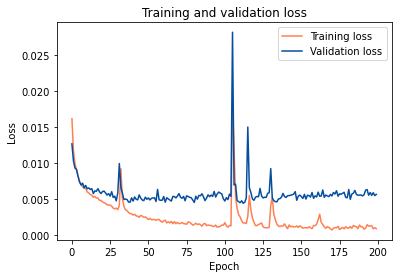

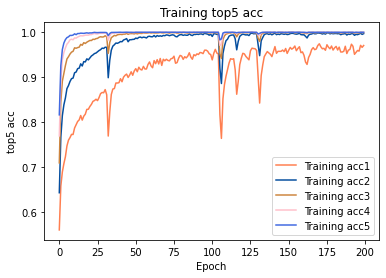

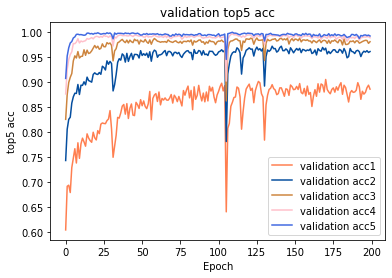

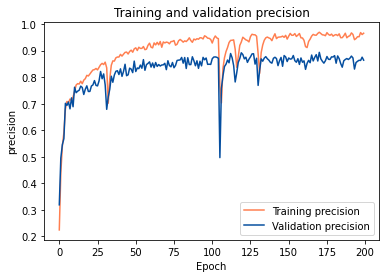

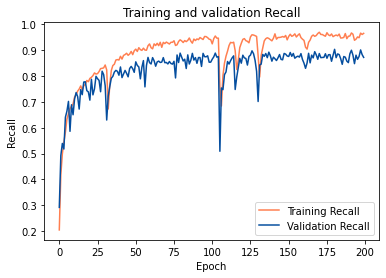

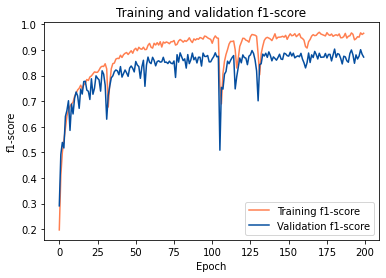

1637234420.089283


In [176]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(lightCNN, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

###  fold3(train)

1637234540.07461
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0166 	 valid Loss: 0.0125
train acc1: 0.5498 	 valid acc1: 0.6482
train acc2: 0.6349 	 valid acc2: 0.7646
train acc3: 0.7044 	 valid acc3: 0.8343
train acc4: 0.7580 	 valid acc4: 0.8782
train acc5: 0.8102 	 valid acc5: 0.9189
train precision: 0.2856 	 valid precision: 0.3852
train recall: 0.1887 	 valid recall: 0.3790
train f1-score: 0.1945 	 valid f1-score: 0.3271
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0110 	 valid Loss: 0.0093
train acc1: 0.6657 	 valid acc1: 0.7196
train acc2: 0.7873 	 valid acc2: 0.8354
train acc3: 0.8662 	 valid acc3: 0.9014
train acc4: 0.9151 	 valid acc4: 0.9471
train acc5: 0.9443 	 valid acc5: 0.9704
train precision: 0.4750 	 valid precision: 0.5615
train recall: 0.4486 	 valid recall: 0.5242
train f1-score: 0.4443 	 valid f1-score: 0.5298
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0094 	 valid Loss: 0.0086
train acc1: 0.6992 	 valid acc1: 0.7346
train acc2: 0.8307 	 valid acc2: 0.8454
train acc3: 0.9039 	 valid acc3: 0.9175
train acc4: 0.9490 	 valid acc4: 0.9536
train acc5: 0.9718 	 valid acc5: 0.9721
train precision: 0.6050 	 valid precision: 0.6107
train recall: 0.5195 	 valid recall: 0.5485
train f1-score: 0.5185 	 valid f1-score: 0.5487
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0085 	 valid Loss: 0.0086
train acc1: 0.7189 	 valid acc1: 0.7050
train acc2: 0.8424 	 valid acc2: 0.8479
train acc3: 0.9201 	 valid acc3: 0.9236
train acc4: 0.9602 	 valid acc4: 0.9607
train acc5: 0.9787 	 valid acc5: 0.9782
train precision: 0.6291 	 valid precision: 0.6340
train recall: 0.5741 	 valid recall: 0.4803
train f1-score: 0.5823 	 valid f1-score: 0.4923
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0080 	 valid Loss: 0.0073
train acc1: 0.7285 	 valid acc1: 0.7639
train acc2: 0.8599 	 valid acc2: 0.8664
train acc3: 0.9314 	 valid acc3: 0.9425
train acc4: 0.9670 	 valid acc4: 0.9700
train acc5: 0.9824 	 valid acc5: 0.9846
train precision: 0.6533 	 valid precision: 0.7035
train recall: 0.5939 	 valid recall: 0.6347
train f1-score: 0.5972 	 valid f1-score: 0.6378
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0075 	 valid Loss: 0.0072
train acc1: 0.7404 	 valid acc1: 0.7557
train acc2: 0.8682 	 valid acc2: 0.8846
train acc3: 0.9431 	 valid acc3: 0.9507
train acc4: 0.9712 	 valid acc4: 0.9771
train acc5: 0.9860 	 valid acc5: 0.9864
train precision: 0.6787 	 valid precision: 0.6581
train recall: 0.6249 	 valid recall: 0.6214
train f1-score: 0.6279 	 valid f1-score: 0.6256
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0075 	 valid Loss: 0.0069
train acc1: 0.7442 	 valid acc1: 0.7729
train acc2: 0.8714 	 valid acc2: 0.8843
train acc3: 0.9439 	 valid acc3: 0.9429
train acc4: 0.9719 	 valid acc4: 0.9732
train acc5: 0.9858 	 valid acc5: 0.9850
train precision: 0.6773 	 valid precision: 0.7056
train recall: 0.6338 	 valid recall: 0.6504
train f1-score: 0.6397 	 valid f1-score: 0.6463
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0074 	 valid Loss: 0.0073
train acc1: 0.7488 	 valid acc1: 0.7518
train acc2: 0.8801 	 valid acc2: 0.8796
train acc3: 0.9460 	 valid acc3: 0.9425
train acc4: 0.9743 	 valid acc4: 0.9696
train acc5: 0.9871 	 valid acc5: 0.9836
train precision: 0.6828 	 valid precision: 0.6692
train recall: 0.6320 	 valid recall: 0.6343
train f1-score: 0.6381 	 valid f1-score: 0.6287
-------第 9 轮训练开始-------
train Loss: 0.0067 	 valid Loss: 0.0068
train acc1: 0.7732 	 valid acc1: 0.7671
train acc2: 0.8924 	 valid acc2: 0.8864
train acc3: 0.9531 	 valid acc3: 0.9504
train acc4: 0.9813 	 valid acc4: 0.9804
train acc5: 0.9915 	 valid acc5: 0.9911
train precision: 0.7406 	 valid precision: 0.6968
train recall: 0.6869 	 valid recall: 0.6928
train f1-score: 0.6920 	 valid f1-score: 0.6671
-------第 10 轮训练开始-------
train Loss: 0.0067 	 valid Loss: 0.0067
train acc1: 0.7690 	 valid acc1: 0.7825
train acc2: 0.8906 	 valid acc2: 0.8871
train acc3: 0.9555 	 valid acc3: 0.9511
train acc4: 0.9810 	 valid 

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0063
train acc1: 0.7876 	 valid acc1: 0.7914
train acc2: 0.9019 	 valid acc2: 0.8989
train acc3: 0.9590 	 valid acc3: 0.9554
train acc4: 0.9843 	 valid acc4: 0.9779
train acc5: 0.9942 	 valid acc5: 0.9918
train precision: 0.7568 	 valid precision: 0.7306
train recall: 0.7130 	 valid recall: 0.7129
train f1-score: 0.7150 	 valid f1-score: 0.7079
-------第 14 轮训练开始-------
train Loss: 0.0059 	 valid Loss: 0.0058
train acc1: 0.7899 	 valid acc1: 0.8032
train acc2: 0.9112 	 valid acc2: 0.9204
train acc3: 0.9651 	 valid acc3: 0.9646
train acc4: 0.9879 	 valid acc4: 0.9868
train acc5: 0.9951 	 valid acc5: 0.9950
train precision: 0.7555 	 valid precision: 0.7600
train recall: 0.7242 	 valid recall: 0.7443
train f1-score: 0.7251 	 valid f1-score: 0.7371
-------第 15 轮训练开始-------
train Loss: 0.0058 	 valid Loss: 0.0059
train acc1: 0.7927 	 valid acc1: 0.7886
train acc2: 0.9129 	 valid acc2: 0.9204
train acc3: 0.9632 	 valid acc3: 0.9621
train acc4: 0.9870 	 valid

train Loss: 0.0036 	 valid Loss: 0.0046
train acc1: 0.8711 	 valid acc1: 0.8454
train acc2: 0.9654 	 valid acc2: 0.9557
train acc3: 0.9907 	 valid acc3: 0.9839
train acc4: 0.9986 	 valid acc4: 0.9950
train acc5: 0.9999 	 valid acc5: 0.9979
train precision: 0.8535 	 valid precision: 0.8112
train recall: 0.8408 	 valid recall: 0.8267
train f1-score: 0.8439 	 valid f1-score: 0.8161
-------第 35 轮训练开始-------
train Loss: 0.0034 	 valid Loss: 0.0046
train acc1: 0.8751 	 valid acc1: 0.8461
train acc2: 0.9696 	 valid acc2: 0.9546
train acc3: 0.9907 	 valid acc3: 0.9839
train acc4: 0.9983 	 valid acc4: 0.9954
train acc5: 0.9996 	 valid acc5: 0.9975
train precision: 0.8623 	 valid precision: 0.8183
train recall: 0.8499 	 valid recall: 0.7941
train f1-score: 0.8525 	 valid f1-score: 0.8002
-------第 36 轮训练开始-------
train Loss: 0.0034 	 valid Loss: 0.0047
train acc1: 0.8715 	 valid acc1: 0.8314
train acc2: 0.9680 	 valid acc2: 0.9511
train acc3: 0.9926 	 valid acc3: 0.9796
train acc4: 0.9979 	 valid

train Loss: 0.0025 	 valid Loss: 0.0060
train acc1: 0.9089 	 valid acc1: 0.8354
train acc2: 0.9876 	 valid acc2: 0.9439
train acc3: 0.9981 	 valid acc3: 0.9775
train acc4: 0.9990 	 valid acc4: 0.9879
train acc5: 0.9998 	 valid acc5: 0.9943
train precision: 0.8941 	 valid precision: 0.7922
train recall: 0.8902 	 valid recall: 0.8008
train f1-score: 0.8917 	 valid f1-score: 0.7890
-------第 56 轮训练开始-------
train Loss: 0.0042 	 valid Loss: 0.0043
train acc1: 0.8661 	 valid acc1: 0.8614
train acc2: 0.9671 	 valid acc2: 0.9586
train acc3: 0.9918 	 valid acc3: 0.9868
train acc4: 0.9970 	 valid acc4: 0.9943
train acc5: 0.9983 	 valid acc5: 0.9964
train precision: 0.8375 	 valid precision: 0.8189
train recall: 0.8323 	 valid recall: 0.8350
train f1-score: 0.8333 	 valid f1-score: 0.8192
-------第 57 轮训练开始-------
train Loss: 0.0029 	 valid Loss: 0.0039
train acc1: 0.9043 	 valid acc1: 0.8782
train acc2: 0.9823 	 valid acc2: 0.9729
train acc3: 0.9962 	 valid acc3: 0.9914
train acc4: 0.9992 	 valid

train Loss: 0.0014 	 valid Loss: 0.0038
train acc1: 0.9490 	 valid acc1: 0.8907
train acc2: 0.9937 	 valid acc2: 0.9729
train acc3: 0.9993 	 valid acc3: 0.9896
train acc4: 0.9996 	 valid acc4: 0.9950
train acc5: 0.9996 	 valid acc5: 0.9968
train precision: 0.9418 	 valid precision: 0.8560
train recall: 0.9409 	 valid recall: 0.8767
train f1-score: 0.9412 	 valid f1-score: 0.8650
-------第 77 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0051
train acc1: 0.9325 	 valid acc1: 0.8739
train acc2: 0.9890 	 valid acc2: 0.9671
train acc3: 0.9983 	 valid acc3: 0.9861
train acc4: 0.9993 	 valid acc4: 0.9939
train acc5: 0.9998 	 valid acc5: 0.9964
train precision: 0.9193 	 valid precision: 0.8428
train recall: 0.9204 	 valid recall: 0.8705
train f1-score: 0.9197 	 valid f1-score: 0.8528
-------第 78 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0041
train acc1: 0.9470 	 valid acc1: 0.8925
train acc2: 0.9946 	 valid acc2: 0.9732
train acc3: 0.9996 	 valid acc3: 0.9918
train acc4: 0.9998 	 valid

train Loss: 0.0014 	 valid Loss: 0.0040
train acc1: 0.9525 	 valid acc1: 0.9089
train acc2: 0.9963 	 valid acc2: 0.9736
train acc3: 0.9992 	 valid acc3: 0.9889
train acc4: 0.9995 	 valid acc4: 0.9939
train acc5: 0.9998 	 valid acc5: 0.9957
train precision: 0.9415 	 valid precision: 0.8854
train recall: 0.9437 	 valid recall: 0.8991
train f1-score: 0.9425 	 valid f1-score: 0.8895
-------第 98 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0042
train acc1: 0.9527 	 valid acc1: 0.8971
train acc2: 0.9962 	 valid acc2: 0.9743
train acc3: 0.9996 	 valid acc3: 0.9886
train acc4: 1.0000 	 valid acc4: 0.9929
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9422 	 valid precision: 0.8716
train recall: 0.9440 	 valid recall: 0.8932
train f1-score: 0.9430 	 valid f1-score: 0.8810
-------第 99 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0042
train acc1: 0.9595 	 valid acc1: 0.8921
train acc2: 0.9963 	 valid acc2: 0.9732
train acc3: 0.9999 	 valid acc3: 0.9896
train acc4: 1.0000 	 valid

train Loss: 0.0013 	 valid Loss: 0.0044
train acc1: 0.9548 	 valid acc1: 0.8939
train acc2: 0.9968 	 valid acc2: 0.9771
train acc3: 0.9995 	 valid acc3: 0.9900
train acc4: 0.9998 	 valid acc4: 0.9950
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9452 	 valid precision: 0.8770
train recall: 0.9442 	 valid recall: 0.8885
train f1-score: 0.9446 	 valid f1-score: 0.8805
-------第 119 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0046
train acc1: 0.9587 	 valid acc1: 0.8889
train acc2: 0.9968 	 valid acc2: 0.9682
train acc3: 0.9995 	 valid acc3: 0.9868
train acc4: 0.9998 	 valid acc4: 0.9939
train acc5: 0.9998 	 valid acc5: 0.9964
train precision: 0.9492 	 valid precision: 0.8639
train recall: 0.9523 	 valid recall: 0.8647
train f1-score: 0.9507 	 valid f1-score: 0.8622
-------第 120 轮训练开始-------
train Loss: 0.0016 	 valid Loss: 0.0045
train acc1: 0.9461 	 valid acc1: 0.8861
train acc2: 0.9921 	 valid acc2: 0.9686
train acc3: 0.9987 	 valid acc3: 0.9871
train acc4: 0.9993 	 val

train Loss: 0.0071 	 valid Loss: 0.0054
train acc1: 0.8348 	 valid acc1: 0.8504
train acc2: 0.9469 	 valid acc2: 0.9521
train acc3: 0.9785 	 valid acc3: 0.9789
train acc4: 0.9923 	 valid acc4: 0.9921
train acc5: 0.9975 	 valid acc5: 0.9964
train precision: 0.8076 	 valid precision: 0.8268
train recall: 0.7854 	 valid recall: 0.8023
train f1-score: 0.7912 	 valid f1-score: 0.8095
-------第 140 轮训练开始-------
train Loss: 0.0033 	 valid Loss: 0.0048
train acc1: 0.8929 	 valid acc1: 0.8614
train acc2: 0.9752 	 valid acc2: 0.9625
train acc3: 0.9930 	 valid acc3: 0.9879
train acc4: 0.9985 	 valid acc4: 0.9961
train acc5: 0.9996 	 valid acc5: 0.9971
train precision: 0.8881 	 valid precision: 0.8301
train recall: 0.8668 	 valid recall: 0.8345
train f1-score: 0.8745 	 valid f1-score: 0.8302
-------第 141 轮训练开始-------
train Loss: 0.0024 	 valid Loss: 0.0044
train acc1: 0.9196 	 valid acc1: 0.8818
train acc2: 0.9863 	 valid acc2: 0.9632
train acc3: 0.9974 	 valid acc3: 0.9900
train acc4: 0.9996 	 val

train Loss: 0.0007 	 valid Loss: 0.0041
train acc1: 0.9730 	 valid acc1: 0.9075
train acc2: 0.9986 	 valid acc2: 0.9771
train acc3: 0.9999 	 valid acc3: 0.9886
train acc4: 1.0000 	 valid acc4: 0.9943
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9686 	 valid precision: 0.8850
train recall: 0.9709 	 valid recall: 0.8921
train f1-score: 0.9697 	 valid f1-score: 0.8878
-------第 161 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0047
train acc1: 0.9693 	 valid acc1: 0.8989
train acc2: 0.9988 	 valid acc2: 0.9754
train acc3: 0.9999 	 valid acc3: 0.9868
train acc4: 1.0000 	 valid acc4: 0.9929
train acc5: 1.0000 	 valid acc5: 0.9954
train precision: 0.9615 	 valid precision: 0.8760
train recall: 0.9619 	 valid recall: 0.9053
train f1-score: 0.9616 	 valid f1-score: 0.8874
-------第 162 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0046
train acc1: 0.9648 	 valid acc1: 0.8932
train acc2: 0.9980 	 valid acc2: 0.9779
train acc3: 0.9998 	 valid acc3: 0.9879
train acc4: 1.0000 	 val

train Loss: 0.0011 	 valid Loss: 0.0043
train acc1: 0.9621 	 valid acc1: 0.9068
train acc2: 0.9974 	 valid acc2: 0.9746
train acc3: 0.9990 	 valid acc3: 0.9868
train acc4: 0.9998 	 valid acc4: 0.9929
train acc5: 1.0000 	 valid acc5: 0.9939
train precision: 0.9545 	 valid precision: 0.8902
train recall: 0.9538 	 valid recall: 0.8886
train f1-score: 0.9541 	 valid f1-score: 0.8889
-------第 182 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0049
train acc1: 0.9646 	 valid acc1: 0.8868
train acc2: 0.9967 	 valid acc2: 0.9711
train acc3: 0.9995 	 valid acc3: 0.9864
train acc4: 0.9999 	 valid acc4: 0.9932
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9597 	 valid precision: 0.8607
train recall: 0.9587 	 valid recall: 0.8554
train f1-score: 0.9591 	 valid f1-score: 0.8565
-------第 183 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0044
train acc1: 0.9651 	 valid acc1: 0.9057
train acc2: 0.9968 	 valid acc2: 0.9757
train acc3: 0.9995 	 valid acc3: 0.9893
train acc4: 1.0000 	 val

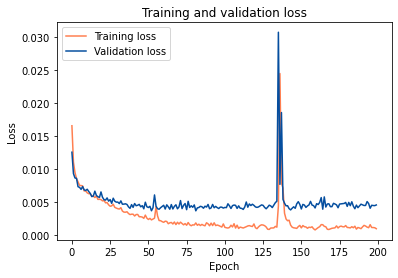

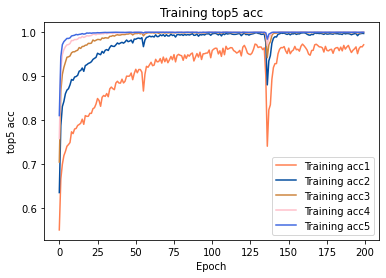

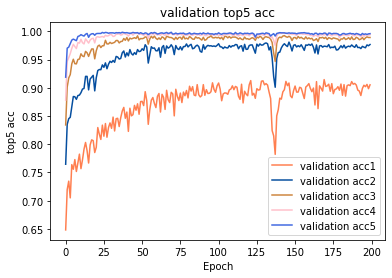

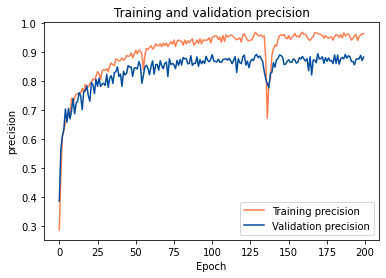

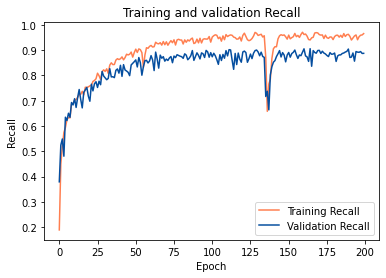

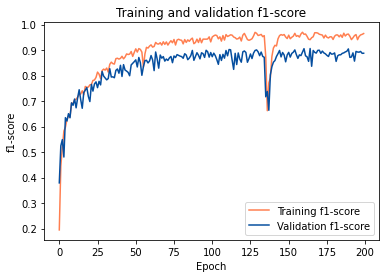

1637235941.131424


In [198]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(lightCNN, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### fold4(train) 

1637236779.590209
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0167 	 valid Loss: 0.0121
train acc1: 0.5504 	 valid acc1: 0.6557
train acc2: 0.6349 	 valid acc2: 0.7496
train acc3: 0.7021 	 valid acc3: 0.8061
train acc4: 0.7545 	 valid acc4: 0.8475
train acc5: 0.8017 	 valid acc5: 0.8871
train precision: 0.2604 	 valid precision: 0.4082
train recall: 0.1925 	 valid recall: 0.4313
train f1-score: 0.1977 	 valid f1-score: 0.4018
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0113 	 valid Loss: 0.0106
train acc1: 0.6701 	 valid acc1: 0.6793
train acc2: 0.7788 	 valid acc2: 0.7964
train acc3: 0.8479 	 valid acc3: 0.8854
train acc4: 0.8937 	 valid acc4: 0.9346
train acc5: 0.9306 	 valid acc5: 0.9596
train precision: 0.4524 	 valid precision: 0.4909
train recall: 0.4506 	 valid recall: 0.4640
train f1-score: 0.4437 	 valid f1-score: 0.4550
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0098 	 valid Loss: 0.0086
train acc1: 0.6877 	 valid acc1: 0.7121
train acc2: 0.8271 	 valid acc2: 0.8439
train acc3: 0.9007 	 valid acc3: 0.9132
train acc4: 0.9433 	 valid acc4: 0.9579
train acc5: 0.9655 	 valid acc5: 0.9789
train precision: 0.5904 	 valid precision: 0.6208
train recall: 0.4945 	 valid recall: 0.5564
train f1-score: 0.5015 	 valid f1-score: 0.5619
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0085 	 valid Loss: 0.0080
train acc1: 0.7087 	 valid acc1: 0.7321
train acc2: 0.8458 	 valid acc2: 0.8557
train acc3: 0.9214 	 valid acc3: 0.9332
train acc4: 0.9627 	 valid acc4: 0.9714
train acc5: 0.9821 	 valid acc5: 0.9846
train precision: 0.6294 	 valid precision: 0.7165
train recall: 0.5612 	 valid recall: 0.5905
train f1-score: 0.5697 	 valid f1-score: 0.6051
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0080 	 valid Loss: 0.0077
train acc1: 0.7275 	 valid acc1: 0.7393
train acc2: 0.8583 	 valid acc2: 0.8500
train acc3: 0.9325 	 valid acc3: 0.9268
train acc4: 0.9681 	 valid acc4: 0.9696
train acc5: 0.9856 	 valid acc5: 0.9850
train precision: 0.6443 	 valid precision: 0.6710
train recall: 0.5929 	 valid recall: 0.6127
train f1-score: 0.5972 	 valid f1-score: 0.6104
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0074 	 valid Loss: 0.0075
train acc1: 0.7427 	 valid acc1: 0.7321
train acc2: 0.8717 	 valid acc2: 0.8764
train acc3: 0.9400 	 valid acc3: 0.9429
train acc4: 0.9755 	 valid acc4: 0.9757
train acc5: 0.9882 	 valid acc5: 0.9864
train precision: 0.6673 	 valid precision: 0.6875
train recall: 0.6308 	 valid recall: 0.6336
train f1-score: 0.6347 	 valid f1-score: 0.6422
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0073 	 valid Loss: 0.0073
train acc1: 0.7465 	 valid acc1: 0.7461
train acc2: 0.8774 	 valid acc2: 0.8736
train acc3: 0.9436 	 valid acc3: 0.9425
train acc4: 0.9767 	 valid acc4: 0.9807
train acc5: 0.9883 	 valid acc5: 0.9918
train precision: 0.6704 	 valid precision: 0.7356
train recall: 0.6349 	 valid recall: 0.5948
train f1-score: 0.6348 	 valid f1-score: 0.6044
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0068 	 valid Loss: 0.0073
train acc1: 0.7652 	 valid acc1: 0.7461
train acc2: 0.8874 	 valid acc2: 0.8757
train acc3: 0.9518 	 valid acc3: 0.9443
train acc4: 0.9806 	 valid acc4: 0.9736
train acc5: 0.9914 	 valid acc5: 0.9821
train precision: 0.7049 	 valid precision: 0.7266
train recall: 0.6640 	 valid recall: 0.5890
train f1-score: 0.6705 	 valid f1-score: 0.6036
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0068 	 valid Loss: 0.0067
train acc1: 0.7630 	 valid acc1: 0.7700
train acc2: 0.8889 	 valid acc2: 0.8954
train acc3: 0.9533 	 valid acc3: 0.9493
train acc4: 0.9814 	 valid acc4: 0.9814
train acc5: 0.9914 	 valid acc5: 0.9936
train precision: 0.6983 	 valid precision: 0.7240
train recall: 0.6637 	 valid recall: 0.6692
train f1-score: 0.6675 	 valid f1-score: 0.6745
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0066 	 valid Loss: 0.0068
train acc1: 0.7775 	 valid acc1: 0.7771
train acc2: 0.8982 	 valid acc2: 0.8818
train acc3: 0.9573 	 valid acc3: 0.9464
train acc4: 0.9839 	 valid acc4: 0.9768
train acc5: 0.9915 	 valid acc5: 0.9893
train precision: 0.7304 	 valid precision: 0.7621
train recall: 0.6880 	 valid recall: 0.6882
train f1-score: 0.6920 	 valid f1-score: 0.6908
-------第 11 轮训练开始-------
train Loss: 0.0063 	 valid Loss: 0.0063
train acc1: 0.7802 	 valid acc1: 0.7954
train acc2: 0.9011 	 valid acc2: 0.9000
train acc3: 0.9586 	 valid acc3: 0.9521
train acc4: 0.9856 	 valid acc4: 0.9857
train acc5: 0.9931 	 valid acc5: 0.9929
train precision: 0.7375 	 valid precision: 0.7665
train recall: 0.7013 	 valid recall: 0.7201
train f1-score: 0.7048 	 valid f1-score: 0.7332
-------第 12 轮训练开始-------
train Loss: 0.0062 	 valid Loss: 0.0060
train acc1: 0.7899 	 valid acc1: 0.8000
train acc2: 0.9052 	 valid acc2: 0.9111
train acc3: 0.9617 	 valid acc3: 0.9632
train acc4: 0.9851 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0059 	 valid Loss: 0.0060
train acc1: 0.7923 	 valid acc1: 0.7929
train acc2: 0.9101 	 valid acc2: 0.9086
train acc3: 0.9644 	 valid acc3: 0.9571
train acc4: 0.9887 	 valid acc4: 0.9854
train acc5: 0.9962 	 valid acc5: 0.9971
train precision: 0.7642 	 valid precision: 0.7717
train recall: 0.7220 	 valid recall: 0.6988
train f1-score: 0.7259 	 valid f1-score: 0.7147
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0059
train acc1: 0.8073 	 valid acc1: 0.8082
train acc2: 0.9230 	 valid acc2: 0.9139
train acc3: 0.9688 	 valid acc3: 0.9632
train acc4: 0.9898 	 valid acc4: 0.9857
train acc5: 0.9960 	 valid acc5: 0.9936
train precision: 0.7731 	 valid precision: 0.7704
train recall: 0.7451 	 valid recall: 0.7369
train f1-score: 0.7458 	 valid f1-score: 0.7401
-------第 16 轮训练开始-------
train Loss: 0.0055 	 valid Loss: 0.0058
train acc1: 0.8114 	 valid acc1: 0.8075
train acc2: 0.9229 	 valid acc2: 0.9161
train acc3: 0.9694 	 valid acc3: 0.9646
train acc4: 0.9896 	 valid acc4: 0.9829
train acc5: 0.9967 	 valid acc5: 0.9918
train precision: 0.7809 	 valid precision: 0.7787
train recall: 0.7499 	 valid recall: 0.7649
train f1-score: 0.7506 	 valid f1-score: 0.7532
-------第 17 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0060
train acc1: 0.7993 	 valid acc1: 0.7957
train acc2: 0.9206 	 valid acc2: 0.9104
train acc3: 0.9687 	 valid acc3: 0.9661
train acc4: 0.9896 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0051 	 valid Loss: 0.0057
train acc1: 0.8208 	 valid acc1: 0.8082
train acc2: 0.9317 	 valid acc2: 0.9171
train acc3: 0.9764 	 valid acc3: 0.9664
train acc4: 0.9930 	 valid acc4: 0.9861
train acc5: 0.9980 	 valid acc5: 0.9957
train precision: 0.7955 	 valid precision: 0.7743
train recall: 0.7676 	 valid recall: 0.7385
train f1-score: 0.7695 	 valid f1-score: 0.7416
-------第 20 轮训练开始-------
train Loss: 0.0049 	 valid Loss: 0.0056
train acc1: 0.8280 	 valid acc1: 0.8104
train acc2: 0.9370 	 valid acc2: 0.9229
train acc3: 0.9768 	 valid acc3: 0.9671
train acc4: 0.9935 	 valid acc4: 0.9879
train acc5: 0.9985 	 valid acc5: 0.9950
train precision: 0.8056 	 valid precision: 0.8054
train recall: 0.7777 	 valid recall: 0.7428
train f1-score: 0.7807 	 valid f1-score: 0.7541
-------第 21 轮训练开始-------
train Loss: 0.0050 	 valid Loss: 0.0058
train acc1: 0.8223 	 valid acc1: 0.8104
train acc2: 0.9361 	 valid acc2: 0.9175
train acc3: 0.9773 	 valid acc3: 0.9643
train acc4: 0.9939 	 valid

train Loss: 0.0032 	 valid Loss: 0.0061
train acc1: 0.8826 	 valid acc1: 0.8375
train acc2: 0.9765 	 valid acc2: 0.9407
train acc3: 0.9937 	 valid acc3: 0.9700
train acc4: 0.9994 	 valid acc4: 0.9921
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.8696 	 valid precision: 0.8317
train recall: 0.8563 	 valid recall: 0.7566
train f1-score: 0.8610 	 valid f1-score: 0.7826
-------第 41 轮训练开始-------
train Loss: 0.0040 	 valid Loss: 0.0052
train acc1: 0.8730 	 valid acc1: 0.8364
train acc2: 0.9708 	 valid acc2: 0.9432
train acc3: 0.9931 	 valid acc3: 0.9757
train acc4: 0.9982 	 valid acc4: 0.9929
train acc5: 0.9988 	 valid acc5: 0.9975
train precision: 0.8547 	 valid precision: 0.8217
train recall: 0.8431 	 valid recall: 0.8101
train f1-score: 0.8461 	 valid f1-score: 0.8124
-------第 42 轮训练开始-------
train Loss: 0.0031 	 valid Loss: 0.0053
train acc1: 0.8895 	 valid acc1: 0.8425
train acc2: 0.9764 	 valid acc2: 0.9436
train acc3: 0.9946 	 valid acc3: 0.9750
train acc4: 0.9989 	 valid

train Loss: 0.0018 	 valid Loss: 0.0047
train acc1: 0.9330 	 valid acc1: 0.8836
train acc2: 0.9932 	 valid acc2: 0.9643
train acc3: 0.9988 	 valid acc3: 0.9829
train acc4: 1.0000 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9231 	 valid precision: 0.8699
train recall: 0.9217 	 valid recall: 0.8658
train f1-score: 0.9219 	 valid f1-score: 0.8645
-------第 62 轮训练开始-------
train Loss: 0.0019 	 valid Loss: 0.0052
train acc1: 0.9313 	 valid acc1: 0.8568
train acc2: 0.9893 	 valid acc2: 0.9554
train acc3: 0.9977 	 valid acc3: 0.9789
train acc4: 0.9999 	 valid acc4: 0.9911
train acc5: 0.9999 	 valid acc5: 0.9950
train precision: 0.9220 	 valid precision: 0.8451
train recall: 0.9217 	 valid recall: 0.8421
train f1-score: 0.9214 	 valid f1-score: 0.8411
-------第 63 轮训练开始-------
train Loss: 0.0020 	 valid Loss: 0.0050
train acc1: 0.9250 	 valid acc1: 0.8764
train acc2: 0.9896 	 valid acc2: 0.9618
train acc3: 0.9986 	 valid acc3: 0.9825
train acc4: 0.9996 	 valid

train Loss: 0.0015 	 valid Loss: 0.0050
train acc1: 0.9460 	 valid acc1: 0.8889
train acc2: 0.9951 	 valid acc2: 0.9629
train acc3: 0.9989 	 valid acc3: 0.9821
train acc4: 0.9999 	 valid acc4: 0.9904
train acc5: 1.0000 	 valid acc5: 0.9936
train precision: 0.9374 	 valid precision: 0.8884
train recall: 0.9392 	 valid recall: 0.8559
train f1-score: 0.9381 	 valid f1-score: 0.8687
-------第 83 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0050
train acc1: 0.9454 	 valid acc1: 0.8746
train acc2: 0.9964 	 valid acc2: 0.9604
train acc3: 0.9994 	 valid acc3: 0.9814
train acc4: 0.9998 	 valid acc4: 0.9896
train acc5: 0.9999 	 valid acc5: 0.9932
train precision: 0.9342 	 valid precision: 0.8631
train recall: 0.9377 	 valid recall: 0.8469
train f1-score: 0.9359 	 valid f1-score: 0.8540
-------第 84 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0053
train acc1: 0.9480 	 valid acc1: 0.8714
train acc2: 0.9952 	 valid acc2: 0.9607
train acc3: 0.9999 	 valid acc3: 0.9807
train acc4: 1.0000 	 valid

train Loss: 0.0130 	 valid Loss: 0.0072
train acc1: 0.8068 	 valid acc1: 0.7986
train acc2: 0.9212 	 valid acc2: 0.9200
train acc3: 0.9639 	 valid acc3: 0.9629
train acc4: 0.9792 	 valid acc4: 0.9843
train acc5: 0.9873 	 valid acc5: 0.9929
train precision: 0.7553 	 valid precision: 0.7663
train recall: 0.7340 	 valid recall: 0.7364
train f1-score: 0.7422 	 valid f1-score: 0.7262
-------第 104 轮训练开始-------
train Loss: 0.0048 	 valid Loss: 0.0054
train acc1: 0.8600 	 valid acc1: 0.8611
train acc2: 0.9588 	 valid acc2: 0.9507
train acc3: 0.9856 	 valid acc3: 0.9818
train acc4: 0.9951 	 valid acc4: 0.9918
train acc5: 0.9976 	 valid acc5: 0.9957
train precision: 0.8372 	 valid precision: 0.8593
train recall: 0.8165 	 valid recall: 0.8163
train f1-score: 0.8232 	 valid f1-score: 0.8302
-------第 105 轮训练开始-------
train Loss: 0.0026 	 valid Loss: 0.0050
train acc1: 0.9113 	 valid acc1: 0.8629
train acc2: 0.9840 	 valid acc2: 0.9475
train acc3: 0.9946 	 valid acc3: 0.9825
train acc4: 0.9987 	 val

train Loss: 0.0010 	 valid Loss: 0.0059
train acc1: 0.9651 	 valid acc1: 0.8836
train acc2: 0.9982 	 valid acc2: 0.9621
train acc3: 0.9998 	 valid acc3: 0.9807
train acc4: 0.9998 	 valid acc4: 0.9921
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9576 	 valid precision: 0.8716
train recall: 0.9598 	 valid recall: 0.8639
train f1-score: 0.9587 	 valid f1-score: 0.8642
-------第 125 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0059
train acc1: 0.9681 	 valid acc1: 0.8904
train acc2: 0.9983 	 valid acc2: 0.9604
train acc3: 0.9998 	 valid acc3: 0.9829
train acc4: 0.9999 	 valid acc4: 0.9886
train acc5: 1.0000 	 valid acc5: 0.9936
train precision: 0.9637 	 valid precision: 0.8835
train recall: 0.9655 	 valid recall: 0.8689
train f1-score: 0.9645 	 valid f1-score: 0.8737
-------第 126 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0051
train acc1: 0.9524 	 valid acc1: 0.9018
train acc2: 0.9975 	 valid acc2: 0.9636
train acc3: 0.9998 	 valid acc3: 0.9850
train acc4: 0.9999 	 val

train Loss: 0.0012 	 valid Loss: 0.0053
train acc1: 0.9613 	 valid acc1: 0.9029
train acc2: 0.9964 	 valid acc2: 0.9696
train acc3: 0.9992 	 valid acc3: 0.9854
train acc4: 0.9995 	 valid acc4: 0.9925
train acc5: 0.9998 	 valid acc5: 0.9943
train precision: 0.9532 	 valid precision: 0.8923
train recall: 0.9550 	 valid recall: 0.8910
train f1-score: 0.9541 	 valid f1-score: 0.8904
-------第 146 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0053
train acc1: 0.9692 	 valid acc1: 0.8939
train acc2: 0.9975 	 valid acc2: 0.9654
train acc3: 0.9998 	 valid acc3: 0.9832
train acc4: 0.9999 	 valid acc4: 0.9900
train acc5: 0.9999 	 valid acc5: 0.9929
train precision: 0.9609 	 valid precision: 0.8760
train recall: 0.9596 	 valid recall: 0.8798
train f1-score: 0.9602 	 valid f1-score: 0.8756
-------第 147 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0051
train acc1: 0.9585 	 valid acc1: 0.8950
train acc2: 0.9949 	 valid acc2: 0.9643
train acc3: 0.9990 	 valid acc3: 0.9804
train acc4: 0.9999 	 val

train Loss: 0.0011 	 valid Loss: 0.0057
train acc1: 0.9619 	 valid acc1: 0.8964
train acc2: 0.9969 	 valid acc2: 0.9654
train acc3: 0.9994 	 valid acc3: 0.9864
train acc4: 1.0000 	 valid acc4: 0.9921
train acc5: 1.0000 	 valid acc5: 0.9950
train precision: 0.9514 	 valid precision: 0.8854
train recall: 0.9527 	 valid recall: 0.8778
train f1-score: 0.9520 	 valid f1-score: 0.8792
-------第 167 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0056
train acc1: 0.9607 	 valid acc1: 0.8811
train acc2: 0.9956 	 valid acc2: 0.9600
train acc3: 0.9989 	 valid acc3: 0.9832
train acc4: 0.9999 	 valid acc4: 0.9914
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9514 	 valid precision: 0.8757
train recall: 0.9535 	 valid recall: 0.8689
train f1-score: 0.9524 	 valid f1-score: 0.8699
-------第 168 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0058
train acc1: 0.9624 	 valid acc1: 0.8979
train acc2: 0.9960 	 valid acc2: 0.9600
train acc3: 0.9989 	 valid acc3: 0.9768
train acc4: 1.0000 	 val

train Loss: 0.0008 	 valid Loss: 0.0052
train acc1: 0.9731 	 valid acc1: 0.9075
train acc2: 0.9989 	 valid acc2: 0.9704
train acc3: 0.9999 	 valid acc3: 0.9825
train acc4: 1.0000 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9954
train precision: 0.9683 	 valid precision: 0.8942
train recall: 0.9681 	 valid recall: 0.8959
train f1-score: 0.9682 	 valid f1-score: 0.8934
-------第 188 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0055
train acc1: 0.9721 	 valid acc1: 0.9021
train acc2: 0.9986 	 valid acc2: 0.9689
train acc3: 0.9998 	 valid acc3: 0.9861
train acc4: 0.9999 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9660 	 valid precision: 0.8916
train recall: 0.9683 	 valid recall: 0.8813
train f1-score: 0.9671 	 valid f1-score: 0.8831
-------第 189 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0060
train acc1: 0.9679 	 valid acc1: 0.8929
train acc2: 0.9982 	 valid acc2: 0.9596
train acc3: 0.9999 	 valid acc3: 0.9779
train acc4: 1.0000 	 val

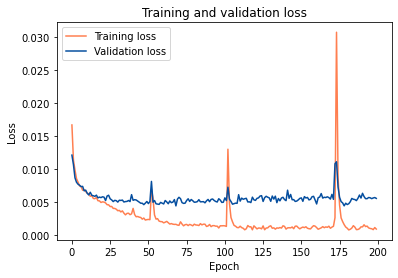

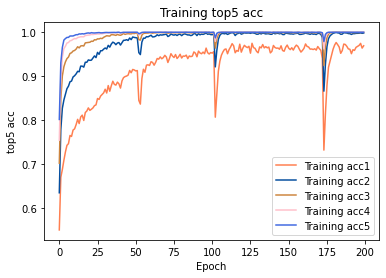

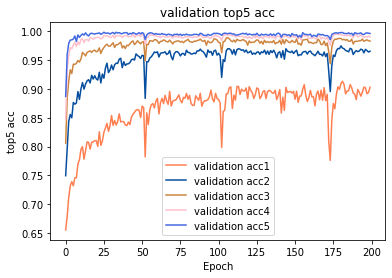

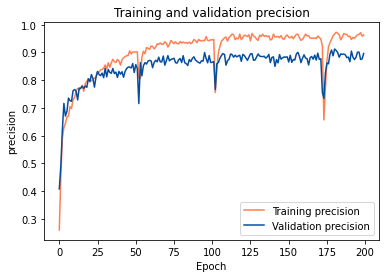

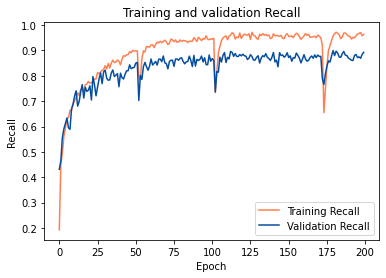

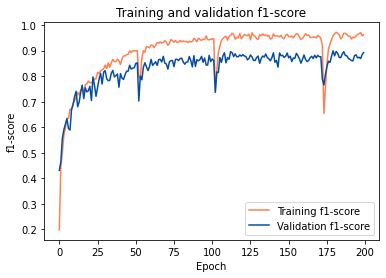

1637238444.07719


In [220]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(lightCNN, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

In [221]:
def test(lightCNN, test_loader):
    '''打印给定胶囊网络的测试统计数据。
       参数capsule_net：训练好的胶囊网络
       参数 test_loader：测试数据加载器
       return：返回最后一批测试图像数据和对应的重建
       '''
    #------计算各类别的分类准确率--------------
#     # 最开始初始化为0
    classes = ['0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','14']
    class_correct = list(0. for i in range(16))
    
#     # 初始化为0
    class_total = list(0. for i in range(16))
    
    test_loss = 0 # loss tracking
    correct, correct1, correct2, correct3, correct4, correct5 = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    test_acc1, test_acc2, test_acc3, test_acc4, test_acc5 = 0.0, 0.0, 0.0, 0.0, 0.0
    precision, recall, f1 = 0.0, 0.0, 0.0
    test_preds = []
    test_trues = []
    
    preds = []
    trues = []
    
    count = 0
    # 模型的结构
    lightCNN.eval() # eval mode

    for batch_i, (data, target) in enumerate(test_loader):
        # target: torch.Size([20, 10])
        data = data.unsqueeze(0)
        data = data.permute(1,2,0)
        target = target.squeeze()
#         target = One_hot(target)
        # 转tensor，batch_labels: torch.Size([32, 16])
#         target = torch.from_numpy(target) 
        target = target.type(torch.LongTensor)
        
        batch_size = data.size(0)

#         if TRAIN_ON_GPU:
#             images, target = images.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        logits = lightCNN(data)
        
                    
            # calculate loss
        loss = criterion(logits, target)

        # update average test loss 
        test_loss += loss.item()
        
        
        target = One_hot(target)
        target = torch.from_numpy(target)
        
        # 计算AUC，绘制AUC曲线
        preds.append(logits.cpu().detach().numpy())
        trues.append(target.cpu().detach().numpy())
        
        # 计算topk准确率，k=1-5
        _, pred = logits.topk(5, 1, largest=True, sorted=True)
        _, labels = torch.max(target.data.cpu(), 1)
        _, labels1 = torch.max(target.data.cpu(), 1)
        labels = labels.view(labels.size(0), -1).expand_as(pred)
        
#         print("topk k pred:", pred)
#         print("topk k labels:", labels)
        
        count += labels.shape[0]
        correct = pred.eq(labels).float()
        correct5 += correct[:, :5].sum()
        correct4 += correct[:, :4].sum()
        correct3 += correct[:, :3].sum()
        correct2 += correct[:, :2].sum()
        correct1 += correct[:, :1].sum()
                
        #-----------计算precision、f1-score、recall--------------
        _, output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
        _, label = torch.max(target.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
        test_trues.append(label.cpu().detach().numpy())
        test_preds.append(output.cpu().detach().numpy())
        
        correct = np.squeeze(output.eq(label.data.view_as(output)))
#         print("correct:", correct)
#         print(label.data[i])
        for i in range(batch_size):
            test_label = label.data[i]
#             print("test_label:", test_label)
            class_correct[test_label] +=  correct[i].item()
            class_total[test_label] += 1
        
    test_acc1 = correct1/count
    test_acc2 = correct2/count
    test_acc3 = correct3/count
    test_acc4 = correct4/count
    test_acc5 = correct5/count
    
    y_true = np.concatenate(test_trues)
    y_pred = np.concatenate(test_preds)
    
#     print("y_true:", y_true)
#     print("y_pred:", y_pred)
    
    ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
    print("测试集各标签分类情况：")
    print(ans)
    
    #---------各标签分类准确率------------
    for i in range(16):
        if class_total[i]>0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
     
    precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
    test_loss = test_loss/len(test_loader)
    test_loss = test_loss/100.0
    print('test Loss: {:.4f} \t'.format(test_loss))
    print('test acc1: {:.4f} \t'.format(test_acc1))
    print('test acc2: {:.4f} \t'.format(test_acc2))
    print('test acc3: {:.4f} \t'.format(test_acc3))
    print('test acc4: {:.4f} \t'.format(test_acc4))
    print('test acc5: {:.4f} \t'.format(test_acc5))
    print('test precision: {:.4f} \t test recall: {:.4f} \t test f1-score: {:.4f}'.format(precision, recall, f1))
    
    preds = np.array(preds)
    preds = preds.reshape(2800, 16)
#     print("preds:", preds)
    
    trues = np.array(trues)
    trues = trues.reshape(2800, 16)
#     print("trues:", trues)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict() 
    n_classes = 16

    #compute fpr and tpr with roc_curve from the ytest true labels to the scores
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(trues[:, i], preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # trues.ravel()合并为一行, (38400,)
    
    #---------------计算micro average roc_auc-----------------
    fpr["micro"], tpr["micro"], _ = roc_curve(trues.ravel(), preds.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print("micro roc_auc:", roc_auc["micro"])
    
    #---------------计算macro average roc_auc-----------------
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
      # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      # Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    print("macro roc_auc:", roc_auc["macro"])
    
    colors = cycle(['blue', 'red', 'green', 'brown', 'purple', 'pink', 'orange', 'black', 'yellow', 'cyan', 'coral', 'crimson', 'darkgoldenrod', 'lavender', 'lime', 'gold'])
    class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
    
    plt.figure(figsize=(12,10))
    plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
    
    #-------------画ROC曲线图------------------------
    for i, color, lbl in zip(range(n_classes), colors, class_labels):
        plt.plot(fpr[i], tpr[i], color = color, lw = 1.5,
        label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw = 2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for 16 Multi-Class Data')
    plt.legend(loc = 'lower right', prop = {'size': 9})
#     fullpath = save_plot_path.joinpath(save_plot_path.stem +'_roc_curve.png')
#     plt.savefig(fullpath)
    plt.show()
    

### fold0(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.93210   0.91060   0.92123      1387
           1    1.00000   1.00000   1.00000        69
           2    1.00000   0.94805   0.97333        77
           3    1.00000   1.00000   1.00000        78
           4    0.92208   0.97260   0.94667        73
           5    0.81188   0.98795   0.89130        83
           6    0.97561   0.91954   0.94675        87
           7    0.70886   0.80000   0.75168        70
           8    0.98765   0.82474   0.89888        97
           9    0.97333   1.00000   0.98649        73
          10    0.69524   0.80220   0.74490        91
          11    0.90667   1.00000   0.95105       136
          12    0.85981   0.80702   0.83258       114
          13    0.72222   0.55085   0.62500       118
          14    0.87324   0.94656   0.90842       131
          15    0.60294   0.70690   0.65079       116

    accuracy                        0.89179      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



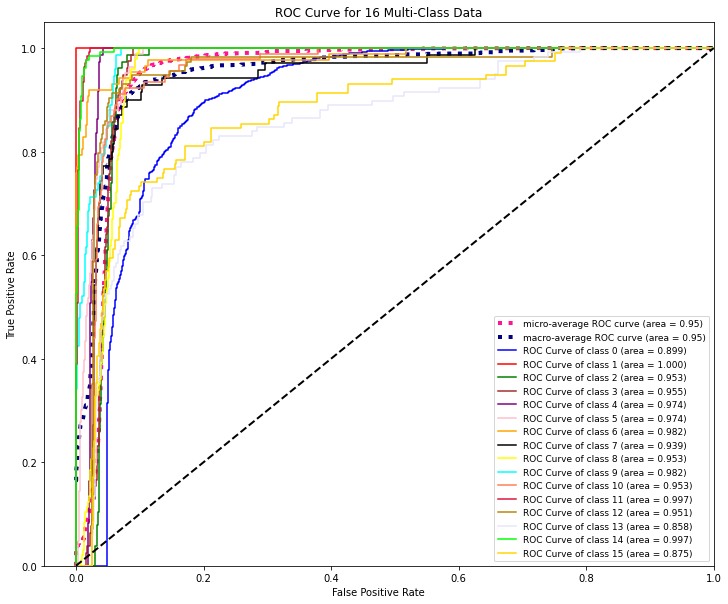

In [134]:
test(lightCNN, test_loader)

### fold1(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.90959   0.92948   0.91943      1418
           1    1.00000   1.00000   1.00000        82
           2    0.96154   0.91463   0.93750        82
           3    0.98571   0.80233   0.88462        86
           4    1.00000   0.88095   0.93671        84
           5    0.76147   0.97647   0.85567        85
           6    0.90667   0.95775   0.93151        71
           7    0.86207   0.69444   0.76923        72
           8    0.98507   0.92958   0.95652        71
           9    0.98795   0.96471   0.97619        85
          10    0.76562   0.65333   0.70504        75
          11    0.85039   0.97297   0.90756       111
          12    0.86726   0.88288   0.87500       111
          13    0.55856   0.46269   0.50612       134
          14    0.89623   0.82609   0.85973       115
          15    0.67164   0.76271   0.71429       118

    accuracy                        0.88179      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



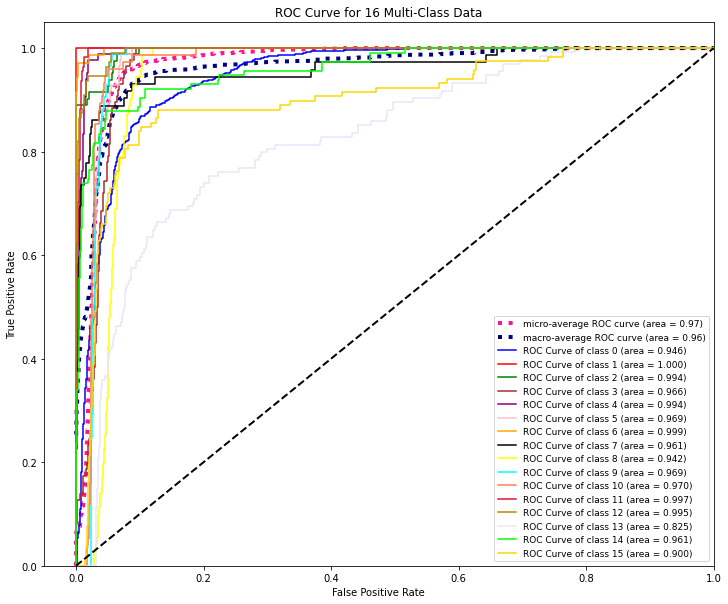

In [156]:
test(lightCNN, test_loader)

###  fold2(test)

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.92981   0.93455   0.93217      1375
           1    1.00000   1.00000   1.00000        85
           2    0.86207   0.93750   0.89820        80
           3    0.89157   1.00000   0.94268        74
           4    0.95349   1.00000   0.97619        82
           5    0.80612   0.87778   0.84043        90
           6    1.00000   0.92593   0.96154        81
           7    0.87059   0.81319   0.84091        91
           8    0.96296   0.83871   0.89655        93
           9    1.00000   0.85366   0.92105        82
          10    0.72840   0.84286   0.78146        70
          11    0.89313   0.99153   0.93976       118
          12    0.95455   0.78947   0.86420       133
          13    0.61345   0.62931   0.62128       116
          14    0.89109   0.83333   0.86124       108
          15    0.79365   0.81967   0.80645       122

    accuracy                        0.90036      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



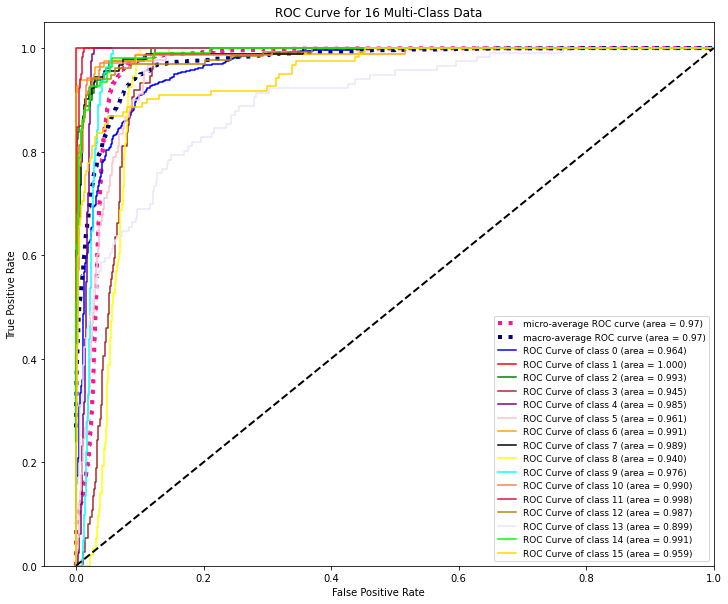

In [178]:
test(lightCNN, test_loader)

### fold3(test)

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.92758   0.92285   0.92521      1374
           1    1.00000   1.00000   1.00000        93
           2    0.94805   0.90123   0.92405        81
           3    0.95238   0.98765   0.96970        81
           4    0.97674   1.00000   0.98824        84
           5    0.91781   0.88158   0.89933        76
           6    0.97619   0.94253   0.95906        87
           7    0.90541   0.79762   0.84810        84
           8    0.91045   0.93846   0.92424        65
           9    0.92771   0.95062   0.93902        81
          10    0.79545   0.76087   0.77778        92
          11    0.94017   0.96491   0.95238       114
          12    0.94118   0.86822   0.90323       129
          13    0.57258   0.63964   0.60426       111
          14    0.86331   0.96000   0.90909       125
          15    0.71200   0.72358   0.71774       123

    accuracy                        0.90143      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



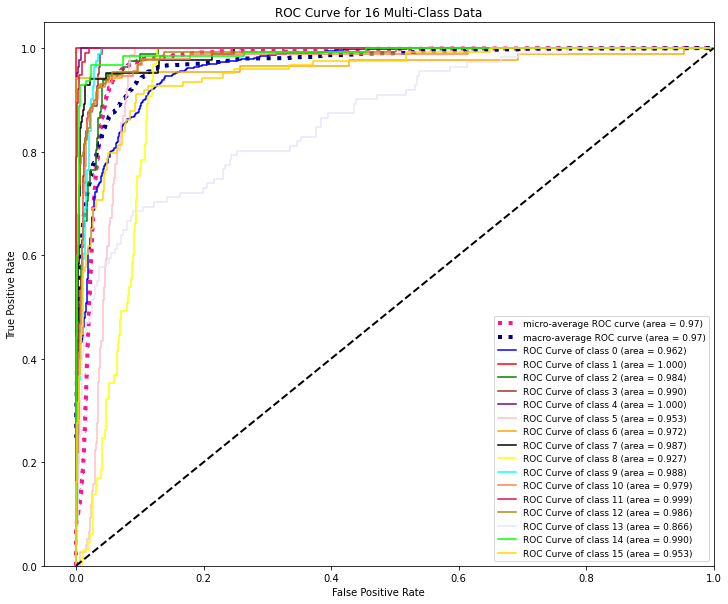

In [200]:
test(lightCNN, test_loader)

### fold4(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.92281   0.93430   0.92852      1446
           1    1.00000   1.00000   1.00000        71
           2    0.97436   0.95000   0.96203        80
           3    1.00000   0.83951   0.91275        81
           4    0.94937   0.97403   0.96154        77
           5    0.79710   0.83333   0.81481        66
           6    1.00000   0.94595   0.97222        74
           7    0.83117   0.77108   0.80000        83
           8    0.87059   1.00000   0.93082        74
           9    0.98750   1.00000   0.99371        79
          10    0.83582   0.77778   0.80576        72
          11    0.93077   1.00000   0.96414       121
          12    0.88596   0.89381   0.88987       113
          13    0.72115   0.61983   0.66667       121
          14    0.82353   0.92562   0.87160       121
          15    0.73148   0.65289   0.68996       121

    accuracy                        0.90250      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



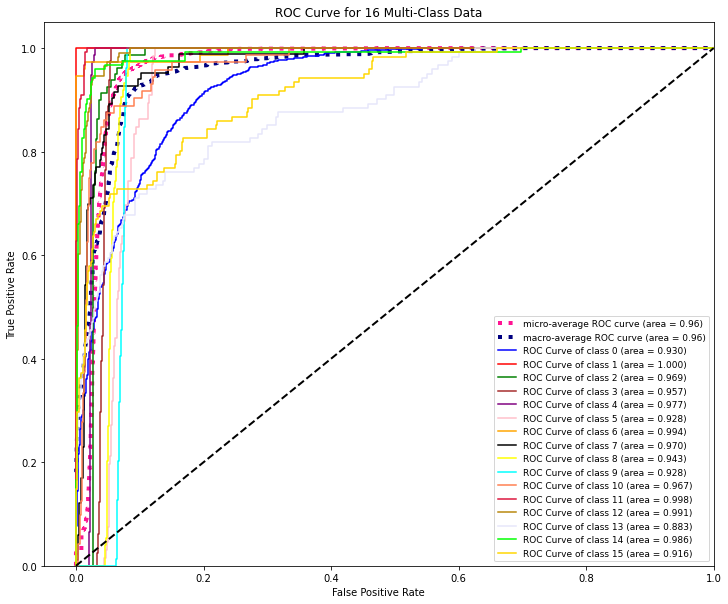

In [222]:
test(lightCNN, test_loader)